In [3]:
#Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()
from datetime import datetime
import datetime
import time
import timestring
import math
import scipy
import os
matplotlib.rcParams['figure.figsize'] = (14, 8)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-the-dataset" data-toc-modified-id="Import-the-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import the dataset</a></span><ul class="toc-item"><li><span><a href="#Split-the-data-into-appropriate-delay-intervals" data-toc-modified-id="Split-the-data-into-appropriate-delay-intervals-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Split the data into appropriate delay intervals</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-Arrival-Delays-for-all-flights-(includes-negative-values-for-early-flights)" data-toc-modified-id="Distribution-of-Arrival-Delays-for-all-flights-(includes-negative-values-for-early-flights)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Distribution of Arrival Delays for all flights (includes negative values for early flights)</a></span></li><li><span><a href="#Distribution-of-long-flights-vs-short-flights" data-toc-modified-id="Distribution-of-long-flights-vs-short-flights-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Distribution of long flights vs short flights</a></span></li><li><span><a href="#Distribution-of-delayed-flights-by-airline:" data-toc-modified-id="Distribution-of-delayed-flights-by-airline:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Distribution of delayed flights by airline:</a></span></li><li><span><a href="#A-glimpse-at-the-carrier-performance-throughout-the-year" data-toc-modified-id="A-glimpse-at-the-carrier-performance-throughout-the-year-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>A glimpse at the carrier performance throughout the year</a></span><ul class="toc-item"><li><span><a href="#Let's-visualize-arrival-delay-distribution-by-carrier." data-toc-modified-id="Let's-visualize-arrival-delay-distribution-by-carrier.-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Let's visualize arrival delay distribution by carrier.</a></span></li><li><span><a href="#Conclusion-and-summaries" data-toc-modified-id="Conclusion-and-summaries-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Conclusion and summaries</a></span></li></ul></li><li><span><a href="#Delays-by-airport" data-toc-modified-id="Delays-by-airport-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Delays by airport</a></span></li><li><span><a href="#Regional-Analysis" data-toc-modified-id="Regional-Analysis-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Regional Analysis</a></span><ul class="toc-item"><li><span><a href="#FAA-has-data-available-for-NAS-delays,-further-broken-down-by-category." data-toc-modified-id="FAA-has-data-available-for-NAS-delays,-further-broken-down-by-category.-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>FAA has data available for NAS delays, further broken down by category.</a></span></li></ul></li><li><span><a href="#Evaluating-congested-times-in-a-selected-region" data-toc-modified-id="Evaluating-congested-times-in-a-selected-region-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Evaluating congested times in a selected region</a></span><ul class="toc-item"><li><span><a href="#Do-busy-times-in-a-given-region-have-a-higher-arrival-delay-time?" data-toc-modified-id="Do-busy-times-in-a-given-region-have-a-higher-arrival-delay-time?-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>Do busy times in a given region have a higher arrival delay time?</a></span></li><li><span><a href="#Total-air-traffic-dataframe" data-toc-modified-id="Total-air-traffic-dataframe-2.7.2"><span class="toc-item-num">2.7.2&nbsp;&nbsp;</span>Total air traffic dataframe</a></span></li><li><span><a href="#Airline-Passenger-Loading-Data-(Load-Factor)" data-toc-modified-id="Airline-Passenger-Loading-Data-(Load-Factor)-2.7.3"><span class="toc-item-num">2.7.3&nbsp;&nbsp;</span>Airline Passenger Loading Data (Load Factor)</a></span></li></ul></li><li><span><a href="#Most-Delayed-and-Most-On-Time-Routes-by-Airline-(Weighted-Average)" data-toc-modified-id="Most-Delayed-and-Most-On-Time-Routes-by-Airline-(Weighted-Average)-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Most Delayed and Most On-Time Routes by Airline (Weighted Average)</a></span><ul class="toc-item"><li><span><a href="#United-Airlines-(Weighted-Average)" data-toc-modified-id="United-Airlines-(Weighted-Average)-2.8.1"><span class="toc-item-num">2.8.1&nbsp;&nbsp;</span>United Airlines (Weighted Average)</a></span><ul class="toc-item"><li><span><a href="#Delayed-most-common-airport-origin-and-destination" data-toc-modified-id="Delayed-most-common-airport-origin-and-destination-2.8.1.1"><span class="toc-item-num">2.8.1.1&nbsp;&nbsp;</span>Delayed most common airport origin and destination</a></span></li><li><span><a href="#On-time-most-common-airport-origin-and-destination" data-toc-modified-id="On-time-most-common-airport-origin-and-destination-2.8.1.2"><span class="toc-item-num">2.8.1.2&nbsp;&nbsp;</span>On-time most common airport origin and destination</a></span></li></ul></li><li><span><a href="#Delta-Airlines-(Weighted-Average)" data-toc-modified-id="Delta-Airlines-(Weighted-Average)-2.8.2"><span class="toc-item-num">2.8.2&nbsp;&nbsp;</span>Delta Airlines (Weighted Average)</a></span></li></ul></li></ul></li></ul></div>

# Import the dataset

In [4]:
year = '2018'

In [5]:
#read in the csv file for desired year
df = pd.read_csv(f'./Data/{year}ALL.csv')

In [6]:
#remove rows will null values which is approximately 1.5%
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Tail_Number               14526
DepTime                  112317
DepDelay                 117234
DepartureDelayGroups     117234
TaxiOut                  115830
WheelsOff                115829
WheelsOn                 119246
TaxiIn                   119246
ArrTime                  119245
ArrDelay                 137040
CRSElapsedTime               10
ActualElapsedTime        134442
AirTime                  134442
CarrierDelay            5860736
WeatherDelay            5860736
NASDelay                5860736
SecurityDelay           5860736
LateAircraftDelay       5860736
dtype: int64

In [7]:
df = df.dropna(subset=['Tail_Number','DepTime','DepDelay','DepartureDelayGroups','TaxiOut',
                      'WheelsOff','WheelsOn','TaxiIn','ArrTime','ArrDelay','CRSElapsedTime',
                      'ActualElapsedTime','AirTime'])

df = df.fillna(0)

In [8]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 100)
pd.set_option('display.max_info_columns', 200)

In [9]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,Dest,DestCityName,DestState,CRSDepTime,DepTime,DepDelay,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2018,4,10,14,7,2018-10-14,AA,N925UY,1674,12892,1289208,32575,LAX,"Los Angeles, CA",CA,CLT,"Charlotte, NC",NC,1123,1127.0,4.0,0.0,1100-1159,26.0,1153.0,1845.0,9.0,1910,1854.0,-16.0,1900-1959,287.0,267.0,232.0,1.0,2125.0,9,0.0,0.0,0.0,0.0,0.0
1,2018,4,10,15,1,2018-10-15,AA,N583UW,1674,12892,1289208,32575,LAX,"Los Angeles, CA",CA,CLT,"Charlotte, NC",NC,1123,1119.0,-4.0,-1.0,1100-1159,23.0,1142.0,1837.0,12.0,1910,1849.0,-21.0,1900-1959,287.0,270.0,235.0,1.0,2125.0,9,0.0,0.0,0.0,0.0,0.0
2,2018,4,10,16,2,2018-10-16,AA,N581UW,1674,12892,1289208,32575,LAX,"Los Angeles, CA",CA,CLT,"Charlotte, NC",NC,1123,1119.0,-4.0,-1.0,1100-1159,20.0,1139.0,1847.0,9.0,1910,1856.0,-14.0,1900-1959,287.0,277.0,248.0,1.0,2125.0,9,0.0,0.0,0.0,0.0,0.0
3,2018,4,10,17,3,2018-10-17,AA,N551UW,1674,12892,1289208,32575,LAX,"Los Angeles, CA",CA,CLT,"Charlotte, NC",NC,1123,1120.0,-3.0,-1.0,1100-1159,20.0,1140.0,1856.0,6.0,1910,1902.0,-8.0,1900-1959,287.0,282.0,256.0,1.0,2125.0,9,0.0,0.0,0.0,0.0,0.0
4,2018,4,10,18,4,2018-10-18,AA,N181UW,1674,12892,1289208,32575,LAX,"Los Angeles, CA",CA,CLT,"Charlotte, NC",NC,1123,1125.0,2.0,0.0,1100-1159,21.0,1146.0,1855.0,11.0,1910,1906.0,-4.0,1900-1959,287.0,281.0,249.0,1.0,2125.0,9,0.0,0.0,0.0,0.0,0.0


In [10]:
df.Reporting_Airline.unique()

array(['AA', 'AS', 'B6', 'DL', 'F9', 'G4', 'UA', 'WN', 'YV', 'YX', 'HA',
       'EV', 'OO', '9E', 'MQ', 'NK', 'OH', 'VX'], dtype=object)

In [11]:
df = df[['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline',
       'Origin', 'OriginState', 'DestState', 'Dest', 'CRSDepTime','DepTime', 'DepDelay',
       'TaxiOut', 'TaxiIn', 'CRSArrTime','ArrTime', 'CRSElapsedTime',
       'ArrDelay', 'Distance', 'DistanceGroup','CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay']]
df = df.reset_index()

## Split the data into appropriate delay intervals

In [12]:
df.head()

,index,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginState,DestState,Dest,CRSDepTime,DepTime,DepDelay,TaxiOut,TaxiIn,CRSArrTime,ArrTime,CRSElapsedTime,ArrDelay,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,4,10,14,7,2018-10-14,AA,N925UY,1674,LAX,CA,NC,CLT,1123,1127.0,4.0,26.0,9.0,1910,1854.0,287.0,-16.0,2125.0,9,0.0,0.0,0.0,0.0,0.0
1,1,4,10,15,1,2018-10-15,AA,N583UW,1674,LAX,CA,NC,CLT,1123,1119.0,-4.0,23.0,12.0,1910,1849.0,287.0,-21.0,2125.0,9,0.0,0.0,0.0,0.0,0.0
2,2,4,10,16,2,2018-10-16,AA,N581UW,1674,LAX,CA,NC,CLT,1123,1119.0,-4.0,20.0,9.0,1910,1856.0,287.0,-14.0,2125.0,9,0.0,0.0,0.0,0.0,0.0
3,3,4,10,17,3,2018-10-17,AA,N551UW,1674,LAX,CA,NC,CLT,1123,1120.0,-3.0,20.0,6.0,1910,1902.0,287.0,-8.0,2125.0,9,0.0,0.0,0.0,0.0,0.0
4,4,4,10,18,4,2018-10-18,AA,N181UW,1674,LAX,CA,NC,CLT,1123,1125.0,2.0,21.0,11.0,1910,1906.0,287.0,-4.0,2125.0,9,0.0,0.0,0.0,0.0,0.0


In [13]:
df.columns

Index(['index', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline',
       'Tail_Number', 'Flight_Number_Reporting_Airline', 'Origin', 'OriginState', 'DestState',
       'Dest', 'CRSDepTime', 'DepTime', 'DepDelay', 'TaxiOut', 'TaxiIn', 'CRSArrTime', 'ArrTime',
       'CRSElapsedTime', 'ArrDelay', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [14]:
#all arrival delays
delays = df[df.ArrDelay > 0]
#arrival delays more than 15 minutes
delays_15 = df[df.ArrDelay > 15]
#arrival delays longer than 4 hrs
delays_4hr = df[df.ArrDelay / 60 >=4]
#arrival delays more than 15mins and less than 4 hrs
delays_15_4 = df[(df.ArrDelay / 60 < 4) & (df.ArrDelay > 15)]

In [15]:
df.Month.count()

7071817

In [16]:
delays_15.Month.count()

1304879

# EDA 

## Distribution of Arrival Delays for all flights (includes negative values for early flights)

(-100, 200)

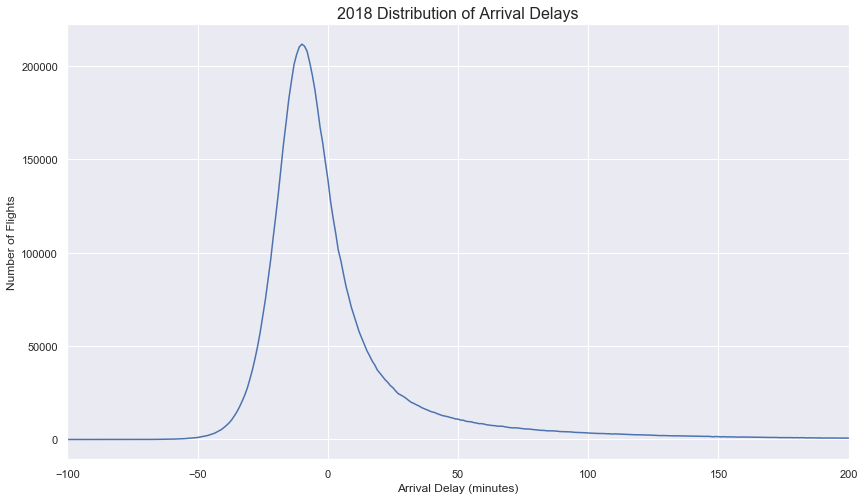

In [17]:
df.groupby('ArrDelay').size().plot()
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('2018 Distribution of Arrival Delays', fontsize=16)
plt.xlim(-100,200)

In [18]:
scipy.stats.skew(df['ArrDelay'])

8.441825372636284

## Distribution of long flights vs short flights

In [19]:
short_route = df[df.CRSElapsedTime < 180]
long_route = df[df.CRSElapsedTime >= 180]

Short flight average delay: 5.58811296225939
Long flight average delay: 3.1668481242134248


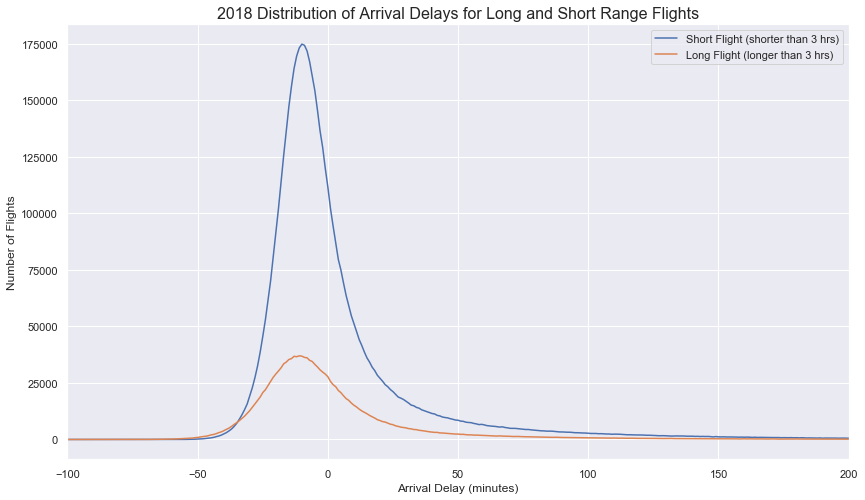

In [20]:
short_route.groupby('ArrDelay').size().plot()
long_route.groupby('ArrDelay').size().plot()
plt.xlim(-100,200)
plt.ylabel('Number of Flights')
plt.title('2018 Distribution of Arrival Delays for Long and Short Range Flights', fontsize=16)
plt.xlabel('Arrival Delay (minutes)')
plt.legend(['Short Flight (shorter than 3 hrs)', 'Long Flight (longer than 3 hrs)'])

print(f'Short flight average delay: {short_route.ArrDelay.mean()}')
print(f'Long flight average delay: {long_route.ArrDelay.mean()}')

The distribution of arrival delays is heavily skewed, with majority of the arrivals being on-time or early. 
One possible way to model the data is to classify if a flight will be delayed or not with a probability. Then we can use linear regreassion or random forrests to determine the length of delay

## Distribution of delayed flights by airline:

In [21]:
print(f'Arrival Delay Mean: {df.ArrDelay.mean()}')
print(f'Arrival Delay Median: {df.ArrDelay.median()}')
print(f'Arrival Delay Standard Deviation: {df.ArrDelay.std()}')

Arrival Delay Mean: 5.055708172312717
Arrival Delay Median: -6.0
Arrival Delay Standard Deviation: 46.93941436351254


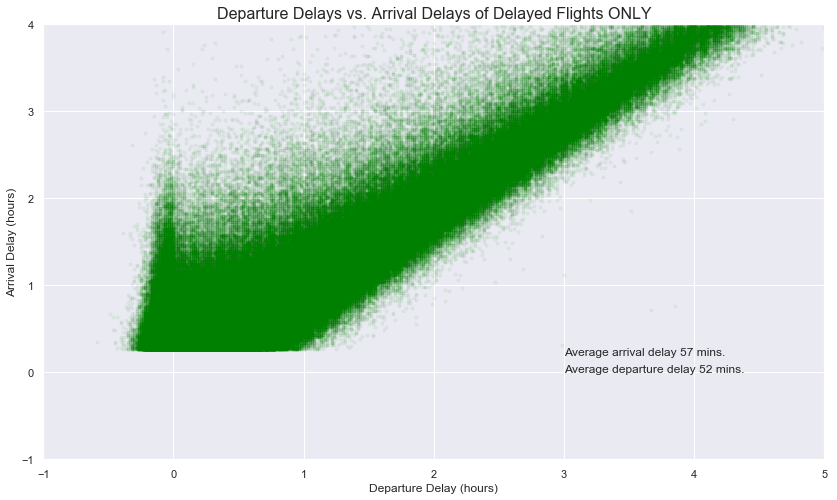

In [22]:
plt.plot(delays_15_4.DepDelay / 60, delays_15_4.ArrDelay / 60, marker='.',
         linestyle='None', alpha = 0.05, color='green')
plt.xlim([-1, 5])
plt.ylim([-1, 4])
plt.xlabel('Departure Delay (hours)')
plt.ylabel('Arrival Delay (hours)')
plt.text(3, 0, f"Average departure delay {round((delays_15_4.DepDelay).mean())} mins.")
plt.text(3, 0.2, f"Average arrival delay {round((delays_15_4.ArrDelay).mean())} mins.")
plt.title('Departure Delays vs. Arrival Delays of Delayed Flights ONLY', fontsize=16)
plt.show()

There is a distinct linear relationship between departure delay and arrival delay, which makes sense. This means  we can also analyze departure delays and causes to predict arrival delays. We also see a small spike around the area of early departure or on time departure but late arrival. This is most likely due to airlines trying to get out on time even though they may be impacted by traffic at the airport, air traffic controll, or even weather. As such, arrival time may still be impacted

## A glimpse at the carrier performance throughout the year

In [23]:
#split the data into delayed flights (>15min. on arrival per FAA) and non-delayed flights
#we then sort the data by index in order to be able to get a ratio of delayed flights
flights_by_carrier = df.groupby('Reporting_Airline').size().sort_index()
flights_by_carrier_del = delays_15.groupby('Reporting_Airline').size().sort_index()
percent_delay = flights_by_carrier_del / flights_by_carrier

sorted_flights = flights_by_carrier.sort_values(ascending=False)
sorted_flights_del = flights_by_carrier_del.sort_values(ascending=False)

#When creating above dataframes we need to make sure that they all have the same index values so we can
#visualize the data correctly.
####use the same index for all data####
sorted_flights_del = sorted_flights_del.get(sorted_flights.index)
percent_delay = percent_delay.get(sorted_flights.index)

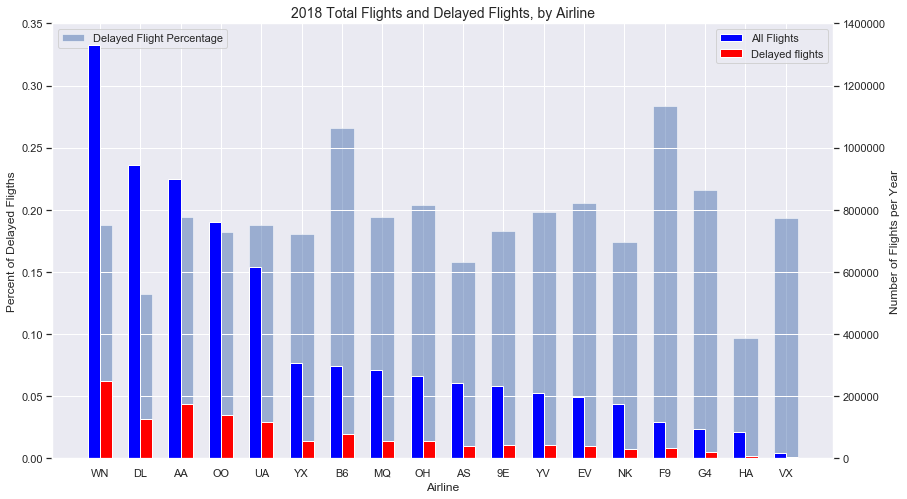

In [24]:
ax = plt.subplot(111)
ax.bar(sorted_flights.index, percent_delay, width=0.6, align='center', alpha=0.5)
plt.xlabel('Airline')
plt.ylabel('Percent of Delayed Fligths')
plt.legend(['Delayed Flight Percentage'], loc='upper left')
plt.ylim(0,0.35)

ax2 = ax.twinx()
ax2.bar(sorted_flights.index, sorted_flights, width=-0.3, align='edge', color='blue')
ax2.bar(sorted_flights_del.index, sorted_flights_del, width=0.3, align='edge', color='red')
plt.legend(['All Flights', 'Delayed flights'])
plt.xlabel('Airline')
plt.ylabel('Number of Flights per Year')
plt.title(f'{year} Total Flights and Delayed Flights, by Airline', fontsize=14)
plt.ylim(0,1400000)
plt.show()

Above chart shows the total number of flights, delayed flights, and the ratio of delayed flights broken down by airline. We can break this down by individual airline and look at top airport and top region performance

In [25]:
#Airline codes with names for cleaner presentation
airline_codes = pd.read_csv('./Data/L_CARRIER_HISTORY.csv')
airline_dict = airline_codes.set_index('Code').to_dict()['Description']

### Let's visualize arrival delay distribution by carrier. 
We'll need to cap the arrival delay to 60 minutes to be able to view the data due to the extreme outliers.

In [26]:
#create a dataframe from existing data containing only the columns we need
df_carriers = df[['Reporting_Airline', 'Origin', 'Dest', 'ArrDelay']]

In [27]:
#add the airline names for easier interpretation 
df_carriers = pd.merge(df_carriers, airline_codes, how='left', left_on='Reporting_Airline', right_on='Code')

In [28]:
df_carriers['ArrDelay'] = df_carriers['ArrDelay'].apply(lambda x: 60 if x>=60 else x)
df_carriers['ArrDelay'] = df_carriers['ArrDelay'].apply(lambda x: -60 if x<=-60 else x)

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


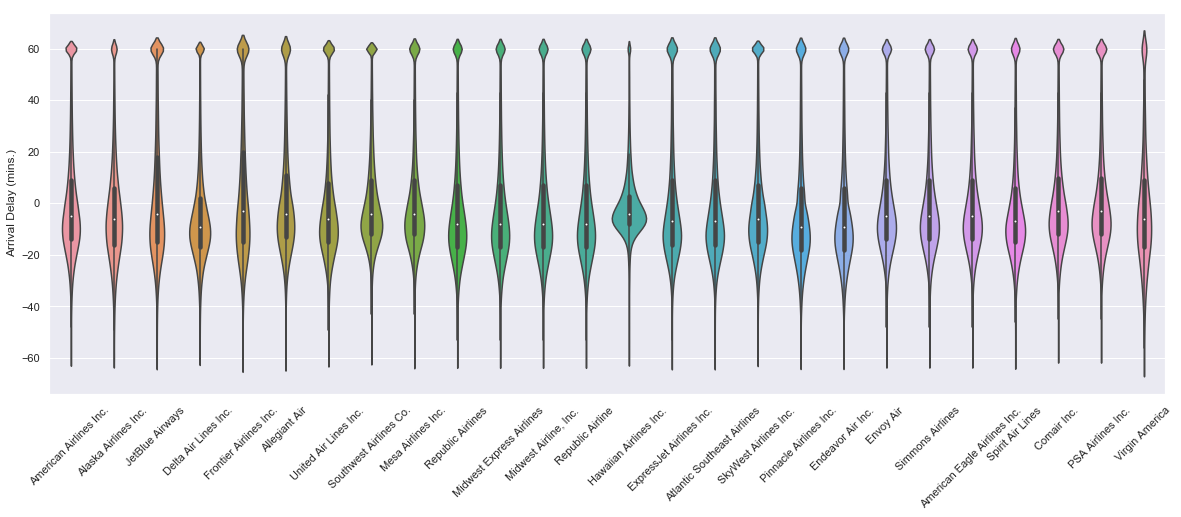

In [29]:
#visualize the data
plt.figure(figsize=(20,7))
ax = sns.violinplot(x='Description', y='ArrDelay', data=df_carriers)
ax.set_ylabel('Arrival Delay (mins.)')
ax.set_xlabel('')
label = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [30]:
percent_delay.index

Index(['WN', 'DL', 'AA', 'OO', 'UA', 'YX', 'B6', 'MQ', 'OH', 'AS', '9E', 'YV', 'EV', 'NK', 'F9',
       'G4', 'HA', 'VX'],
      dtype='object', name='Reporting_Airline')

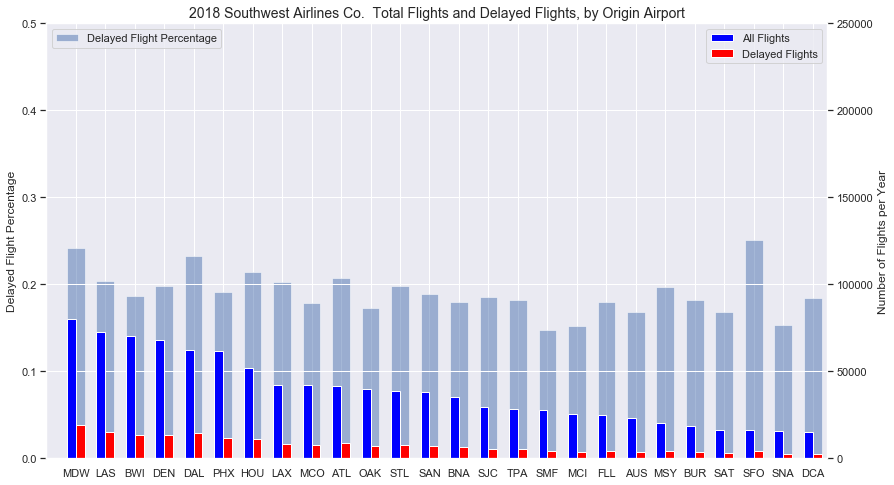

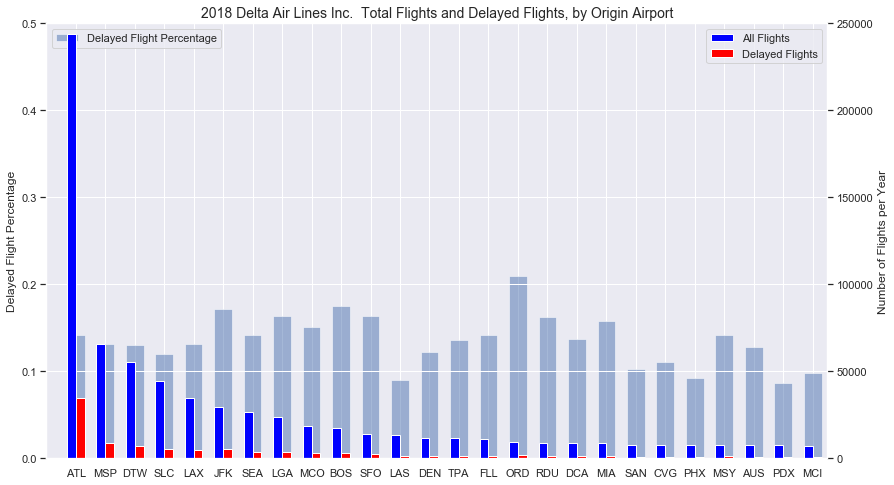

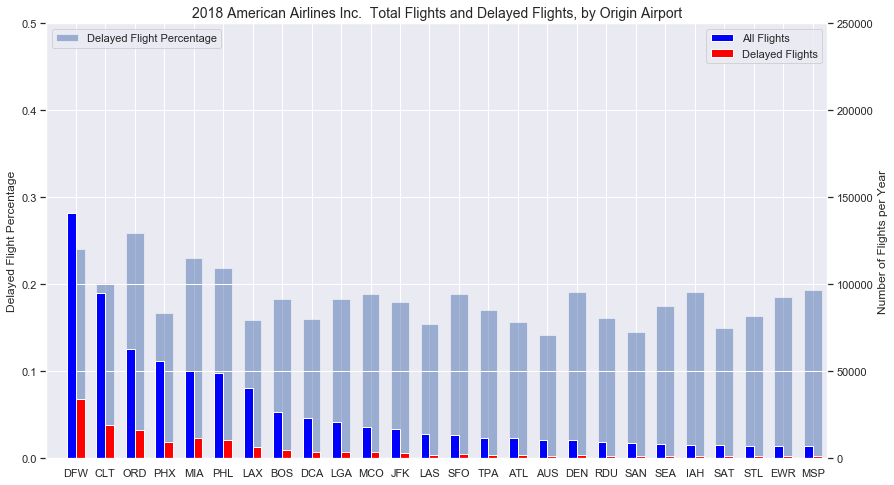

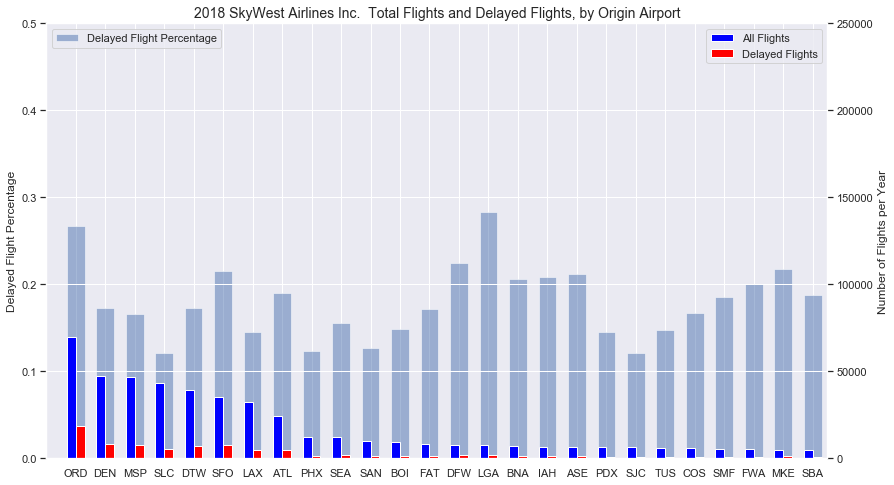

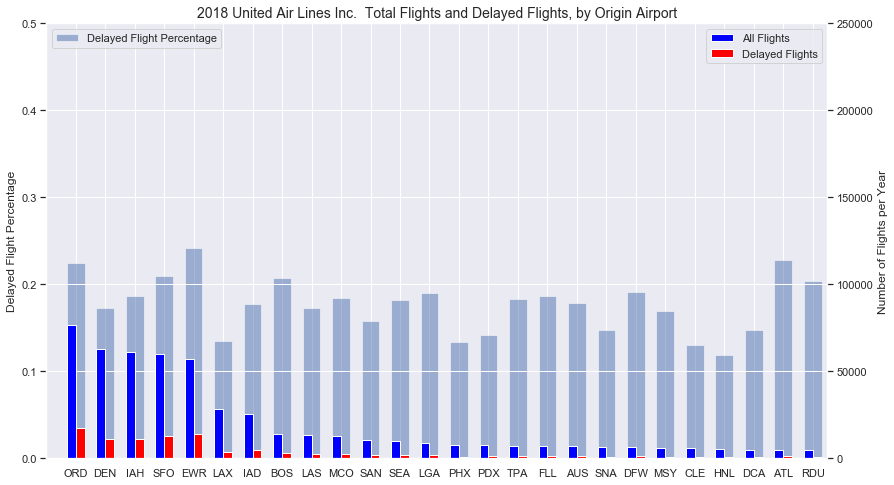

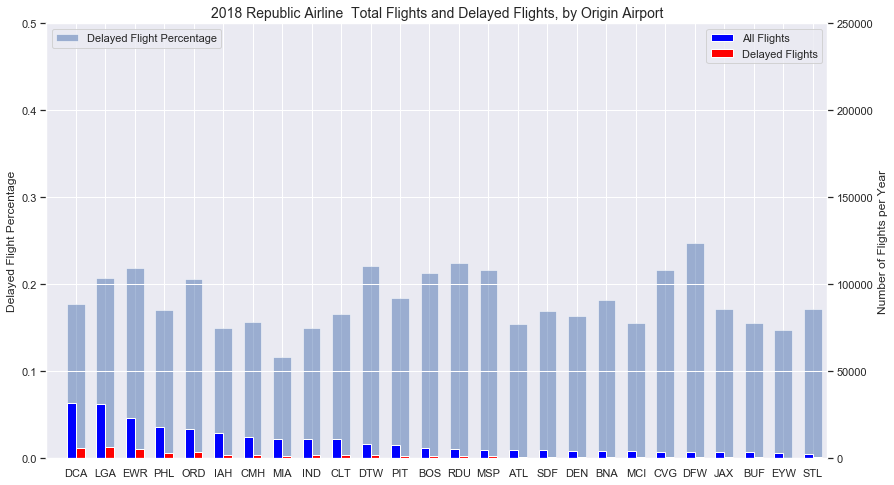

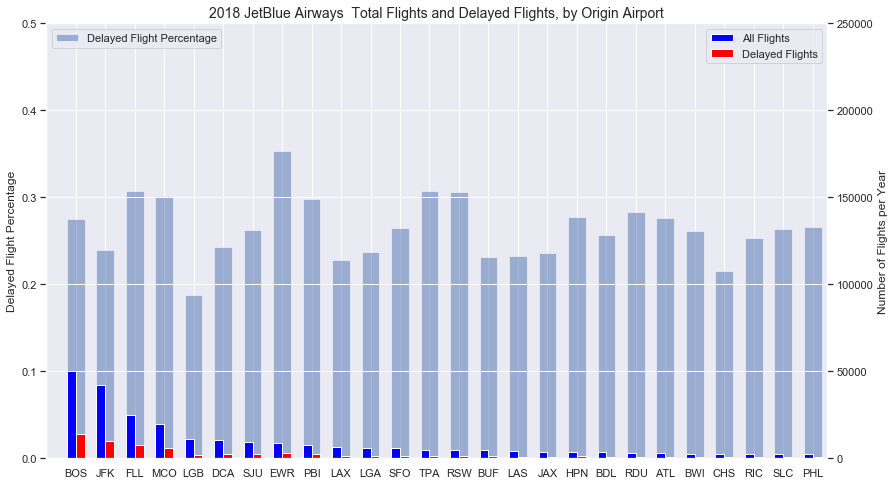

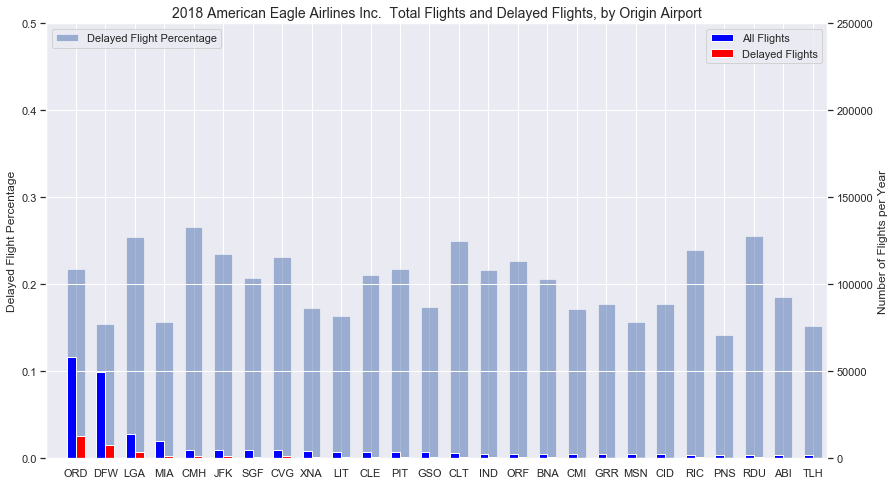

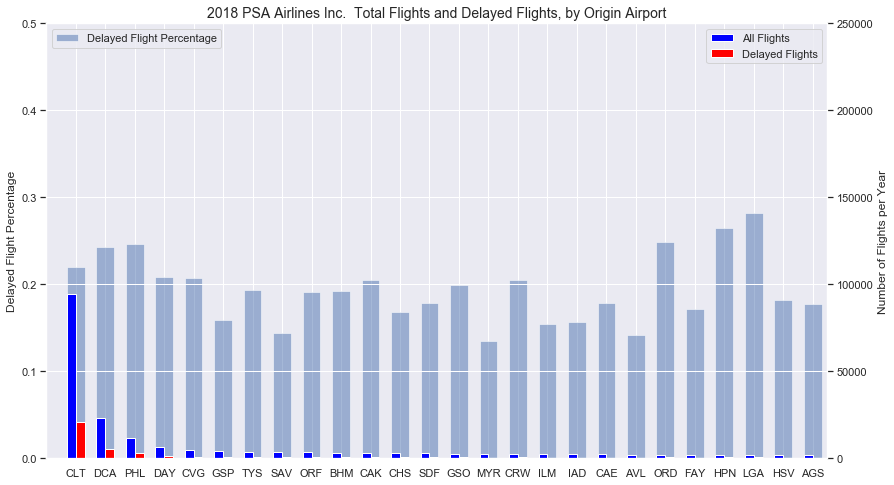

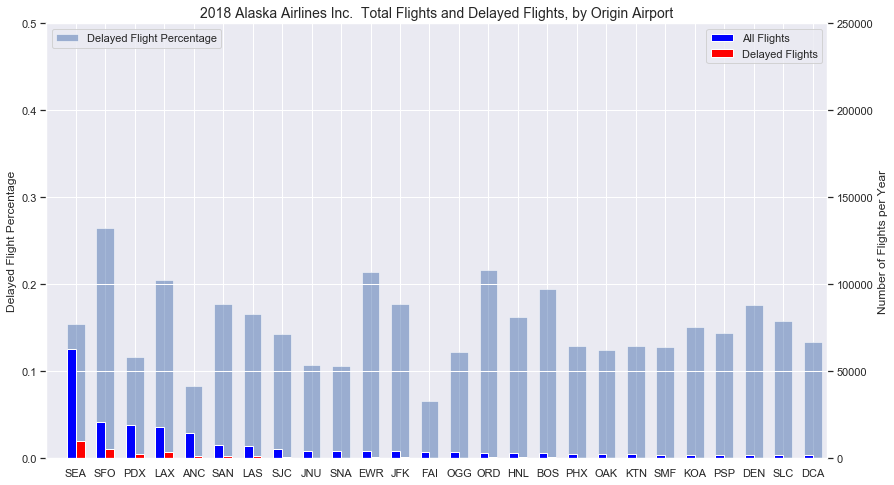

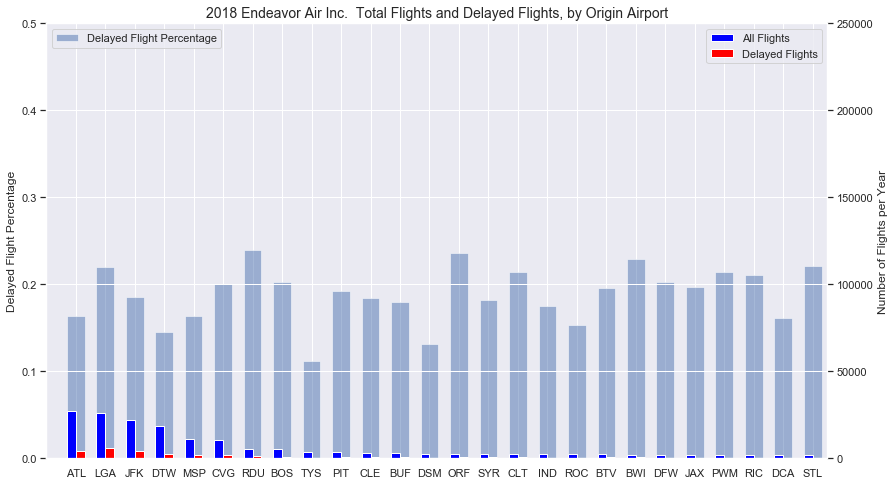

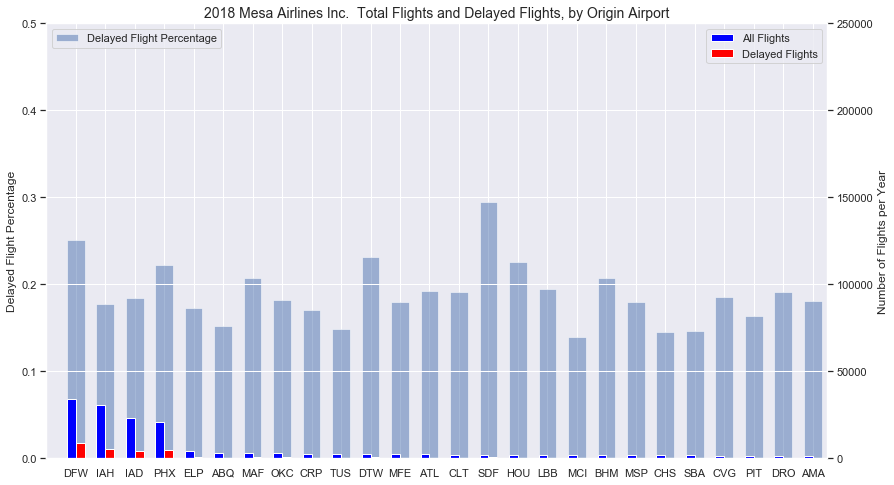

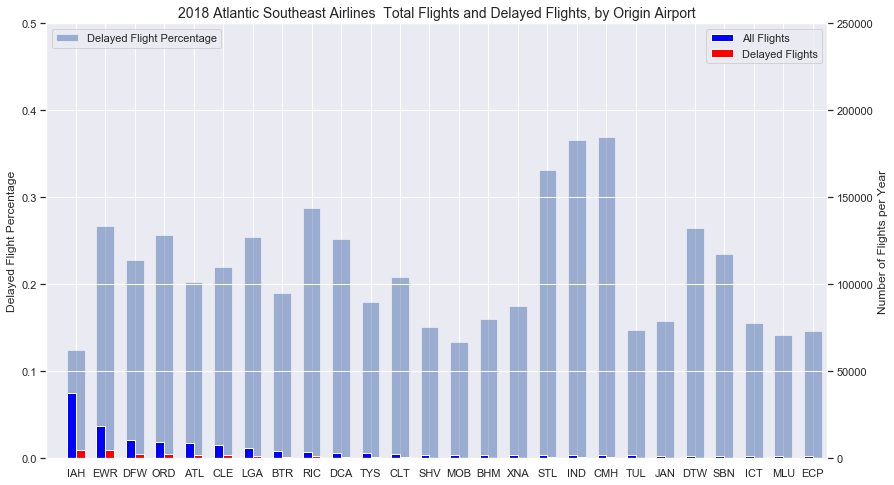

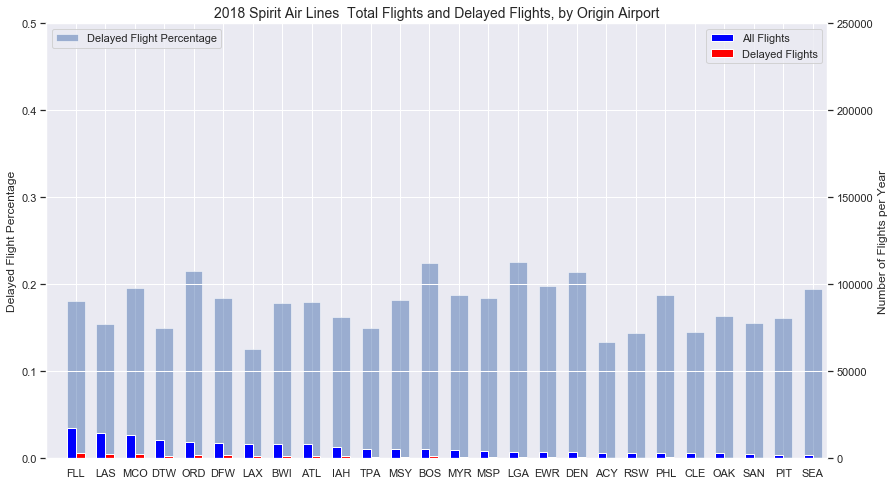

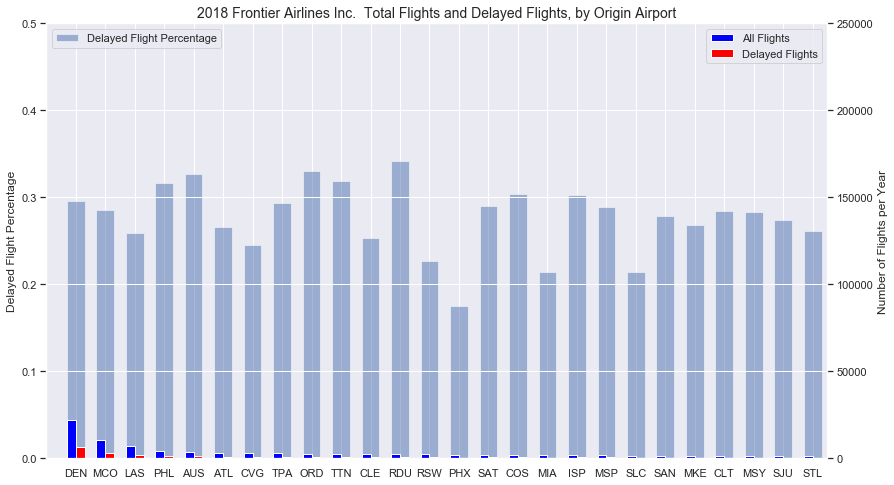

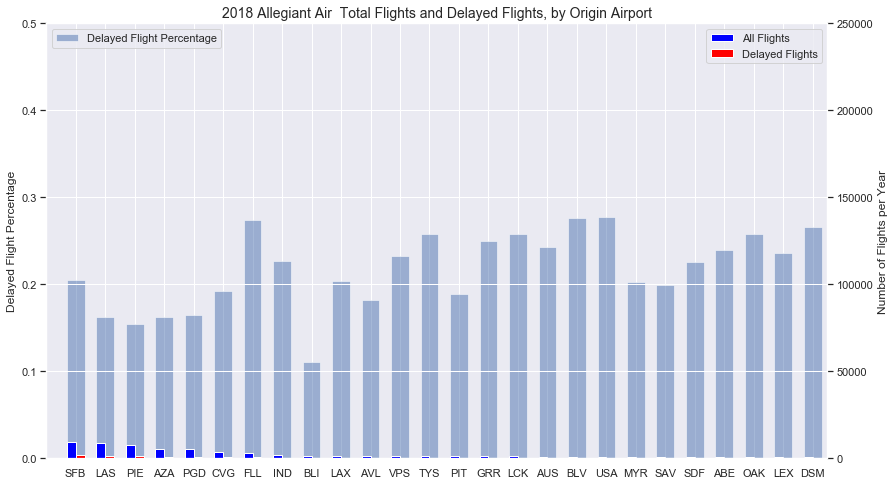

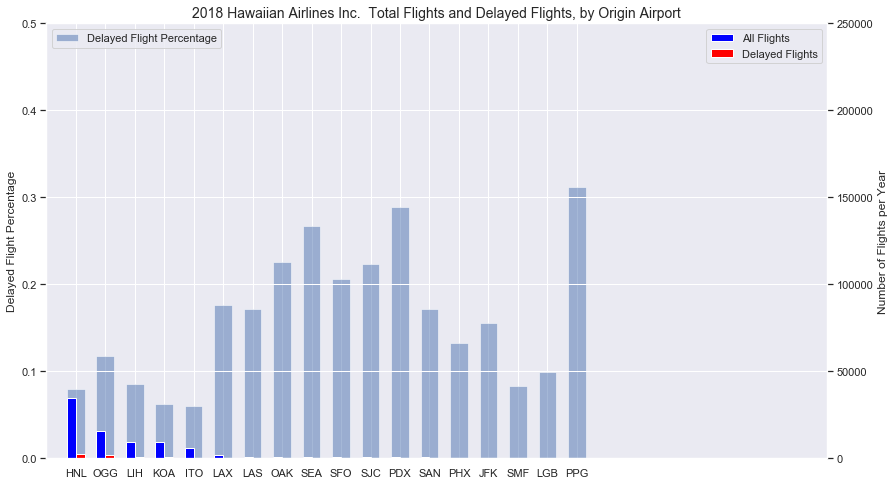

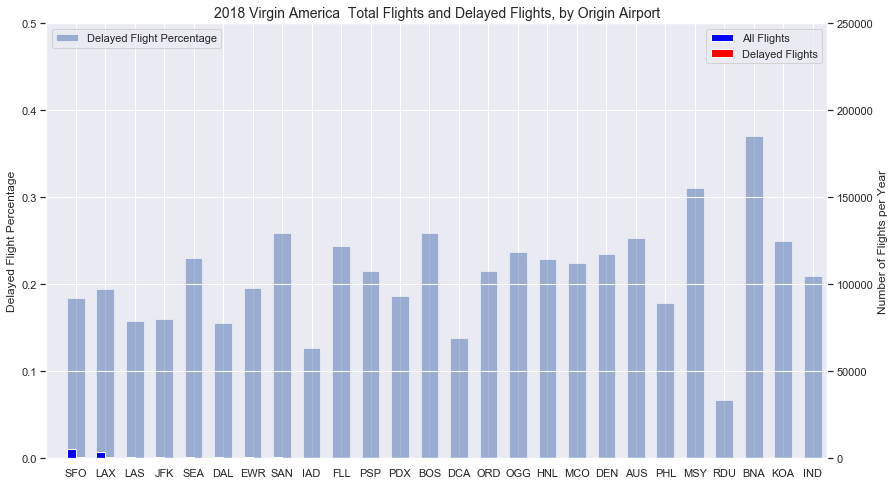

In [31]:
for name in percent_delay.index:
    airline_name=name
    #Let's break the above data down by airline.
    #Most flights are by Southwest and they have a relatively high delay frequency
    airline = df[df.Reporting_Airline == airline_name]
    airline_del = delays_15[delays_15.Reporting_Airline == airline_name]

    airline_byOrigin = airline.groupby('Origin').size().sort_values(ascending=False)[0:60]
    airline_byOrigin_del = airline_del.groupby('Origin').size().sort_values(ascending=False)[0:60]

    indexed_airline = airline.groupby('Origin').size().sort_values(ascending=False).sort_index()
    indexed_airline_del = airline_del.groupby('Origin').size().sort_values(ascending=False).sort_index()
    airline_ratio = indexed_airline_del / indexed_airline
    airline_ratio = airline_ratio.dropna(axis=0)
    delay_ratio = airline_ratio.get(airline_byOrigin.index)

    ####use the same index for all data
    airline_byOrigin_del = airline_byOrigin_del.get(airline_byOrigin.index)
    airline_disp_name = airline_dict.get(airline_name)
    
    ax = plt.subplot(111)
    ax.bar(airline_byOrigin.index, delay_ratio, width=0.6, align='center', alpha=0.5)
    plt.legend(['Delayed Flight Percentage'], loc='upper left')
    plt.ylabel('Delayed Flight Percentage')
    plt.ylim(0, 0.50)

    ax2 = ax.twinx()
    ax2.bar(airline_byOrigin.index, airline_byOrigin, width=-0.3, align='edge', color='blue')
    ax2.bar(airline_byOrigin_del.index, airline_byOrigin_del, width=0.3, align='edge', color='red')
    plt.legend(['All Flights', 'Delayed Flights'])
    plt.xlabel('Origin Airport')
    plt.ylabel('Number of Flights per Year')
    plt.title(f'{year} {airline_disp_name} Total Flights and Delayed Flights, by Origin Airport', fontsize=14)
    plt.xlim(-1,25.5)
    plt.ylim(0,250000)
    plt.show()

### Conclusion and summaries
Above analysis shows that the arrival delay percentage is highly variable and depends on airports and airlines, given all other factors are equal such as weather and traffic.

## Delays by airport

In [32]:
airports = df.groupby('Origin').size().sort_values(ascending=False)[0:40]
airports_del = delays_15.groupby('Origin').size().sort_values(ascending=False)[0:40]

test = df.groupby('Origin').size().sort_values(ascending=False).sort_index()
test_del = delays_15.groupby('Origin').size().sort_values(ascending=False).sort_index()

ratio = test_del / test 
delay_ratio = ratio.get(airports.index)

####use the same index for all data
airports_del = airports_del.get(airports.index)

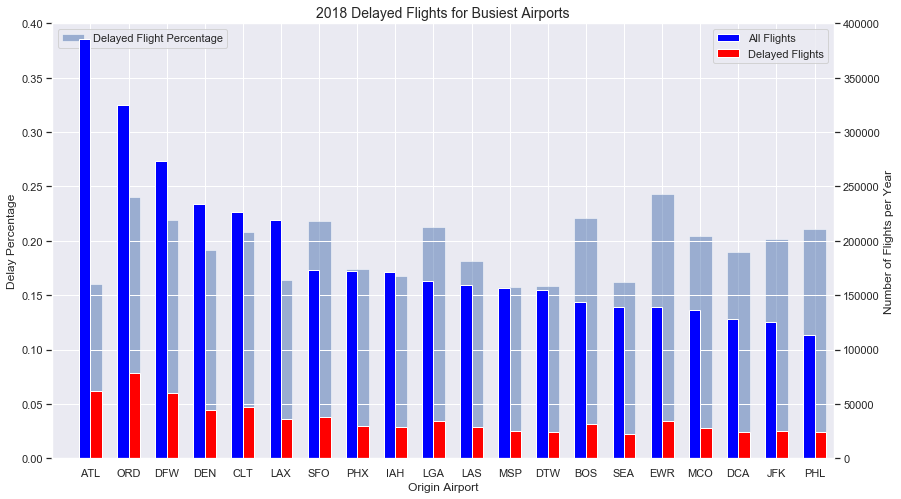

In [33]:
ax = plt.subplot(111)
ax.bar(delay_ratio.keys(), delay_ratio, width=0.6, align='center', alpha=0.5)
plt.ylim(0,0.4)
plt.legend(['Delayed Flight Percentage'], loc='upper left')
plt.xlabel('Origin Airport')
plt.ylabel('Delay Percentage')

ax2 = ax.twinx()
ax2.bar(airports.index, airports, width=-0.3, align='edge', color='blue')
ax2.bar(airports_del.index, airports_del, width=0.3, align='edge', color='red')
plt.legend([ 'All Flights', 'Delayed Flights'])

plt.ylabel('Number of Flights per Year')
plt.title(f'{year} Delayed Flights for Busiest Airports', fontsize=14)
plt.xlim(-1,19.5)
plt.ylim(0,400000)

plt.show()

In [34]:
df.DepDelay.mean()

9.902049501563742

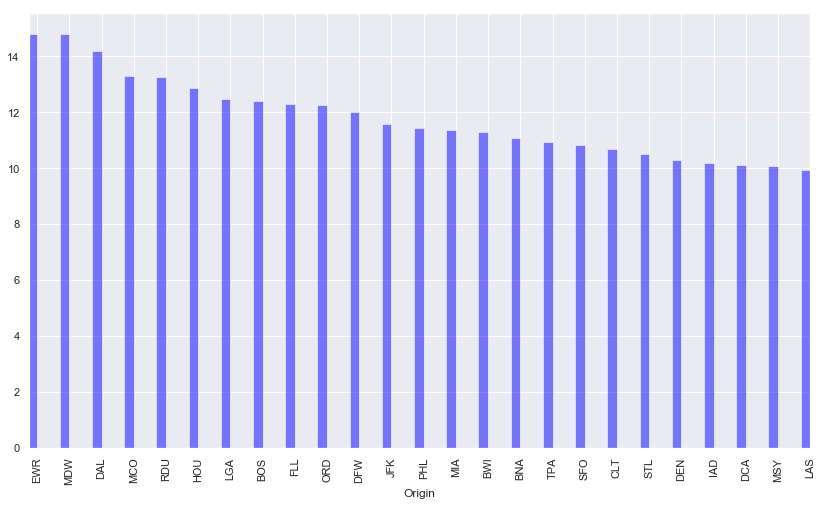

In [35]:
df[df.Origin.isin(airports.index)].groupby('Origin')['DepDelay'].mean()\
.sort_values(ascending=False)[0:25].plot(kind='bar', color='blue', alpha=0.5, width=-0.3, align='edge')
#df[df.Origin.isin(airports.index)].groupby('Origin')['ArrDelay'].mean()\
#.sort_values(ascending=False)[0:25].plot(kind='bar', color='red', alpha=0.5, width=0.3, align='edge')



## Regional Analysis 

In [36]:
#import airport location information csv
airport_location = pd.read_csv('./Data/airport_loc.csv')
#combine Latitude and Longitude into a tuple and form a new column and drop the Latitude & Longitude columns
airport_location['location'] = list(zip(airport_location.Latitude, airport_location.Longitude))
airports_locs = airport_location.copy()
airports_locs.head()
airports_locs.drop(['Latitude', 'Longitude'], axis=1, inplace=True)
airport_loc = airports_locs.set_index('locationID').to_dict()['location']

In [37]:
#For regional calculation we'll set up a "radius" around the airport, for that we'll need a custom function
def radius(airport, miles):
    '''This function will return the absolute difference (in degrees) from the original location to the perimeter
    given the distance, and coordinates of the original location'''
    #based on ~69 miles per one degree of latitude
    coordinates = airport_loc.get(airport)
    #get the minimum and maximum latitudes, since latitude doesn't vary dramatically with distance away from equator
    #we can just compute the latitude variance by direct conversion of 69 miles per degree
    lat_var = miles / 69
    min_lat = coordinates[0] - lat_var
    max_lat = coordinates[0] + lat_var
    
    #longitude distance between degrees depends on the latitude, so we'll use the above computed latitudes to 
    #compute the variance in longitude
    long_min = miles / (math.cos(min_lat * math.pi / 180) * 69.172)  
    long_max = miles / (math.cos(max_lat * math.pi / 180) * 69.172)
    
    min_long = coordinates[1] - long_min
    max_long = coordinates[1] + long_max
    
    latitude = [min_lat, max_lat]
    longitude = [min_long, max_long]
    
    return latitude, longitude

In [38]:
def region_airports(airport, miles):
    '''This function takes airport code and distance around it as an input and
    returns a list of airport within the specified distance'''
    coordinates = radius(airport, miles)
    #print(coordinates)
    airports_locs = airport_location.copy()
    airports_locs = airports_locs[(airports_locs.Latitude >= coordinates[0][0]) & (airports_locs.Latitude <= coordinates[0][1]) &
                       (airports_locs.Longitude >= coordinates[1][0]) & (airports_locs.Longitude <= coordinates[1][1])]
    
    unique_list = airports_locs['locationID'].unique()
    return unique_list

Input airport and radius in miles:

In [39]:
#returns a new dataframe with only the Origin airports that are within the specified radius
regional_airports = set(region_airports('JFK', 30))
all_airports = set(df.Origin)
matching_local_airports = list(regional_airports.intersection(all_airports))
#"local" DataFrame only has origin airports
local = df[df.Origin.isin(matching_local_airports)]

In [40]:
matching_local_airports.append('National Average')

Text(0.5, 1.0, 'Selected Region Airport Delays vs National Average Delays')

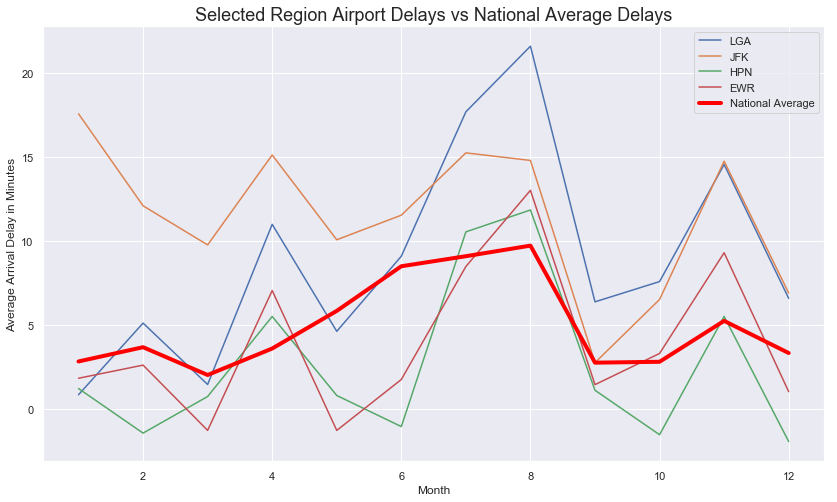

In [41]:
local.groupby(['Month', 'Origin'])['ArrDelay'].mean().unstack().plot()
df.groupby(['Month'])['ArrDelay'].mean().plot(linewidth=4, color='red')
plt.legend(matching_local_airports)
plt.ylabel('Average Arrival Delay in Minutes')
plt.xlabel('Month')
plt.title('Selected Region Airport Delays vs National Average Delays', fontsize=18)

In [42]:
local.groupby("Origin")['ArrDelay'].mean().dropna()

Origin
EWR     8.998358
HPN    11.403958
JFK     2.734556
LGA     4.016515
Name: ArrDelay, dtype: float64

Text(0.5, 1.0, 'Selected Region Airport Delays vs National Average Delays')

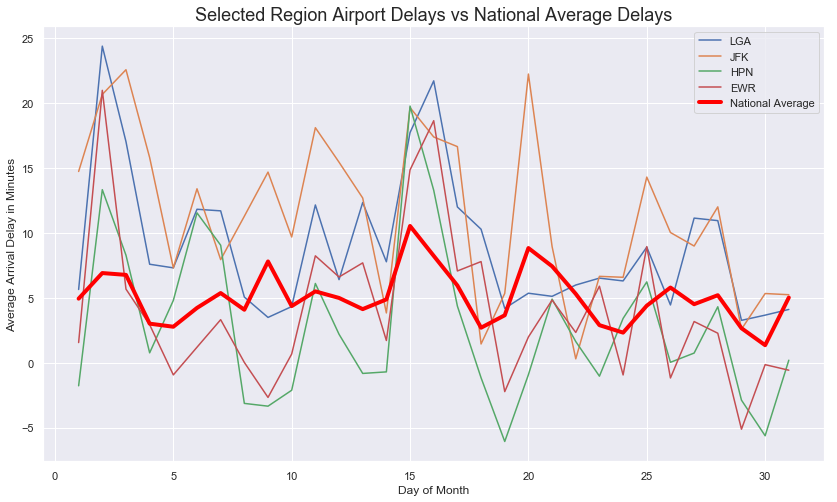

In [43]:
local.groupby(['DayofMonth', 'Origin'])['ArrDelay'].mean().unstack().plot()
df.groupby(['DayofMonth'])['ArrDelay'].mean().plot(linewidth=4, color='red')
plt.legend(matching_local_airports)
plt.ylabel('Average Arrival Delay in Minutes')
plt.xlabel('Day of Month')
plt.title('Selected Region Airport Delays vs National Average Delays', fontsize=18)

Text(0.5, 1.0, 'Selected Region Airport Delays vs National Average Delays')

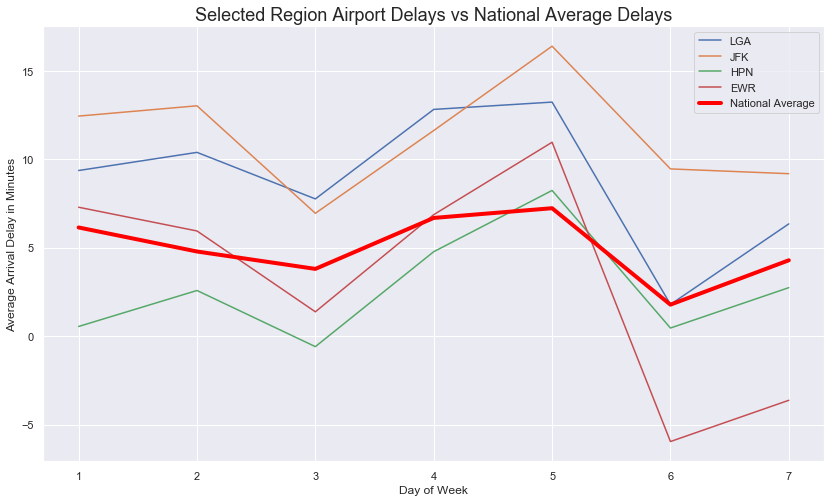

In [44]:
local.groupby(['DayOfWeek', 'Origin'])['ArrDelay'].mean().unstack().plot()
df.groupby(['DayOfWeek'])['ArrDelay'].mean().plot(linewidth=4, color='red')
plt.legend(matching_local_airports)
plt.ylabel('Average Arrival Delay in Minutes')
plt.xlabel('Day of Week')
plt.title('Selected Region Airport Delays vs National Average Delays', fontsize=18)

In [45]:
JFK = local[local.Origin == 'JFK']
EWR = local[local.Origin == 'EWR']
LGA = local[local.Origin == 'LGA']

Text(0.5, 1.0, 'Arrival Delay Distribution')

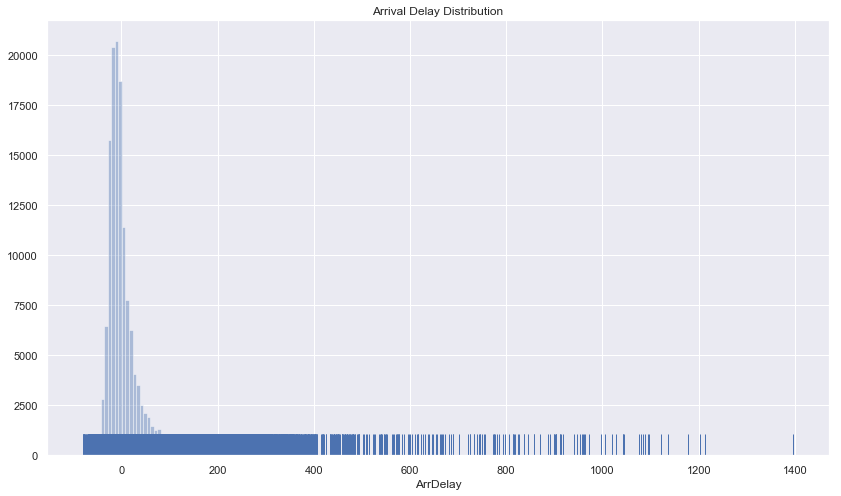

In [46]:
sns.distplot(EWR.ArrDelay, bins=200, kde=False, rug=True)
plt.title('Arrival Delay Distribution')

In [47]:
df.columns

Index(['index', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline',
       'Tail_Number', 'Flight_Number_Reporting_Airline', 'Origin', 'OriginState', 'DestState',
       'Dest', 'CRSDepTime', 'DepTime', 'DepDelay', 'TaxiOut', 'TaxiIn', 'CRSArrTime', 'ArrTime',
       'CRSElapsedTime', 'ArrDelay', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

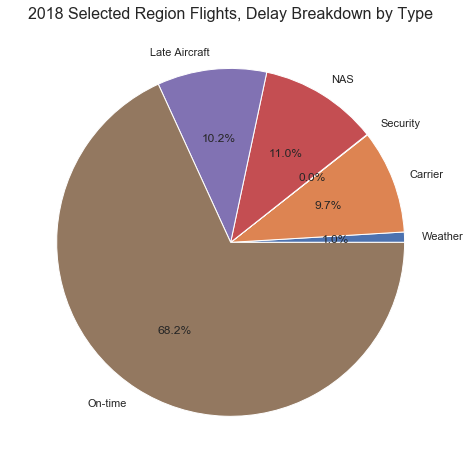

In [48]:
all_flights = local.Month.count()
on_time_df = local[local.ArrDelay <= 15]
delay_df = local[local.ArrDelay > 15]
on_time = on_time_df.Month.count()

weather = delay_df[delay_df.WeatherDelay > 0].count()
carrier = delay_df[delay_df.CarrierDelay > 0].count()
NAS = delay_df[delay_df.NASDelay > 0].count()
security = delay_df[delay_df.SecurityDelay > 0].count()
late_aircraft = delay_df[delay_df.LateAircraftDelay > 0].count()

weather_percent = weather.Month / all_flights
carrier_percent = carrier.Month / all_flights
NAS_percent = NAS.Month / all_flights
security_percent = security.Month / all_flights
late_aircraft_delay_percent = late_aircraft.Month / all_flights
no_delay_percent = on_time / all_flights

x = [weather_percent, carrier_percent, security_percent, NAS_percent, 
     late_aircraft_delay_percent, no_delay_percent]

plt.pie(x, labels=['Weather', 'Carrier', 'Security', 'NAS', 'Late Aircraft', 'On-time'], autopct='%1.1f%%')
plt.title(f'{year} Selected Region Flights, Delay Breakdown by Type', fontsize=16)
plt.show()

How does this compare to all National Flights in 2017?

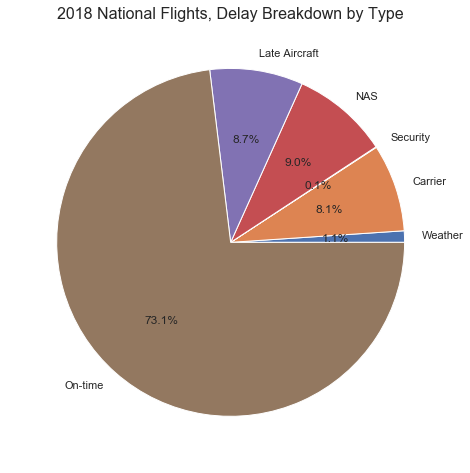

In [49]:
all_flights_nat = df.Month.count()
on_time_df_nat = df[df.ArrDelay <= 15]
delay_df_nat = df[df.ArrDelay > 15]
on_time_nat = on_time_df_nat.Month.count()

weather_nat = delay_df_nat[delay_df_nat.WeatherDelay > 0].count()
carrier_nat = delay_df_nat[delay_df_nat.CarrierDelay > 0].count()
NAS_nat = delay_df_nat[delay_df_nat.NASDelay > 0].count()
security_nat = delay_df_nat[delay_df_nat.SecurityDelay > 0].count()
late_aircraft_nat = delay_df_nat[delay_df_nat.LateAircraftDelay > 0].count()

weather_percent_nat = weather_nat.Month / all_flights_nat
carrier_percent_nat = carrier_nat.Month / all_flights_nat
NAS_percent_nat = NAS_nat.Month / all_flights_nat
security_percent_nat = security_nat.Month / all_flights_nat
late_aircraft_delay_percent_nat = late_aircraft_nat.Month / all_flights_nat
no_delay_percent_nat = on_time_nat / all_flights_nat

x = [weather_percent_nat, carrier_percent_nat, security_percent_nat, NAS_percent_nat, 
     late_aircraft_delay_percent_nat, no_delay_percent_nat]

plt.pie(x, labels=['Weather', 'Carrier', 'Security', 'NAS', 'Late Aircraft', 'On-time'], autopct='%1.1f%%')
plt.title(f'{year} National Flights, Delay Breakdown by Type', fontsize=16)
plt.show()

In [50]:
del matching_local_airports[-1]

### FAA has data available for NAS delays, further broken down by category.
https://aspm.faa.gov/opsnet/sys/Delays.asp

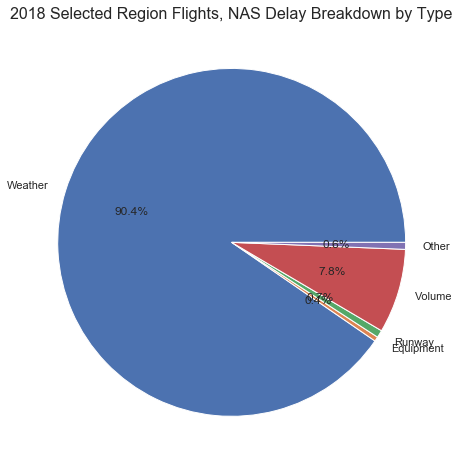

In [51]:
nas_delay = pd.read_csv('./Data/NAS_delay.csv')
NAS_by_year = nas_delay[(nas_delay.Year == float(year)) & nas_delay.Facility.isin(matching_local_airports)]
total_time = NAS_by_year.groupby('Facility')['all Total min.'].sum().sort_index()
volume_time = NAS_by_year.groupby('Facility')['volume total'].sum().sort_index()
equipment_time = NAS_by_year.groupby('Facility')['Equipment total'].sum().sort_index()
runway_time = NAS_by_year.groupby('Facility')['runway total'].sum().sort_index()
other_time = NAS_by_year.groupby('Facility')['other total'].sum().sort_index()
weather_time = NAS_by_year.groupby('Facility')['Weather total'].sum().sort_index()

percent_volume = volume_time / total_time
percent_equipment = equipment_time / total_time
percent_runway = runway_time / total_time
percent_other = other_time / total_time
percent_weather = weather_time / total_time

total_time = total_time.sort_values(ascending=False)

percent_volume = percent_volume.get(total_time.index)[0:100]
percent_equipment = percent_equipment.get(total_time.index)[0:100]
percent_runway = percent_runway.get(total_time.index)[0:100]
percent_other = percent_other.get(total_time.index)[0:100]
percent_weather = percent_weather.get(total_time.index)[0:100]

all_weather = weather_time.sum() / total_time.sum()
all_equipment = equipment_time.sum() / total_time.sum()
all_runway = runway_time.sum() / total_time.sum()
all_volume = volume_time.sum() / total_time.sum()
all_other = other_time.sum() / total_time.sum()

x = [all_weather, all_equipment, all_runway, all_volume, all_other]

plt.pie(x, labels=['Weather', 'Equipment', 'Runway', 'Volume', 'Other'], autopct='%1.1f%%')
plt.title(f'{year} Selected Region Flights, NAS Delay Breakdown by Type', fontsize=16)
plt.show()

Weather delay average: 0.8591608343547038 mins.
Carrier delay average: 4.317043332836966 mins.
NAS delay average: 4.027910333214969 mins.
Security delay average: 0.018121212815431668 mins.
Late Aircraft delay average: 6.846242311084638 mins.


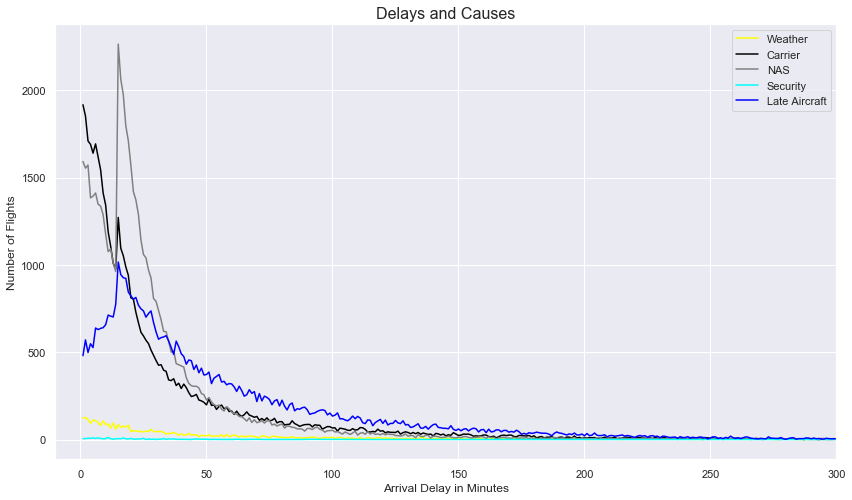

In [52]:
print(f'Weather delay average: {local.WeatherDelay.mean()} mins.')
print(f'Carrier delay average: {local.CarrierDelay.mean()} mins.')
print(f'NAS delay average: {local.NASDelay.mean()} mins.')
print(f'Security delay average: {local.SecurityDelay.mean()} mins.')
print(f'Late Aircraft delay average: {local.LateAircraftDelay.mean()} mins.')

local.groupby('WeatherDelay').size()[1:].plot(color='yellow')
local.groupby('CarrierDelay').size()[1:].plot(color='black')
local.groupby('NASDelay').size()[1:].plot(color='gray')
local.groupby('SecurityDelay').size()[1:].plot(color='cyan')
local.groupby('LateAircraftDelay').size()[1:].plot(color='blue')
plt.xlim(-10,300)
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Number of Flights')
plt.title('Delays and Causes', fontsize=16)
plt.legend(['Weather', 'Carrier', 'NAS', 'Security', 'Late Aircraft'])

NAS - We can continue to look at patterns for heavy traffic or trends in increassing air traffic patterns areas and look for consitancies. Addionally, although extreme events are not considered here, normal weather patterns that cause air traffic slowdowns are. Looking at weather patterns may be beneficial. FAA has a database breaking down the NAS delays by cause. (FAA OPSNET)

Carrier - carrier performance can be further analyzed by location and see if there are patterns

Late Aircraft - This can be handled with arrival delay information. This field highly depends on the other delay causes.

## Evaluating congested times in a selected region

### Do busy times in a given region have a higher arrival delay time?

In [53]:
#define a useful function
def time_to_float(time):
    '''This function will convert time that is incorrectly represented into a float
    for easier plotting with matplotlib'''
    if len(str(int(time))) > 2:
        denom = time / 2400.0
        numer = (float(str(int(time))[:-2:]) + float(str(int(time))[-2:])/60)/24
        ratio = numer / denom
        time_float = time * ratio
    else:
        time_float = time / 60 * 100 
    return time_float

In [54]:
matching_local_airports

['LGA', 'JFK', 'HPN', 'EWR']

In [55]:
#we'll need to consider all arriving and departing traffic in the region to undestand congestion delays
arriving_flights = df[df.Dest.isin(matching_local_airports)]
departing_flights = df[df.Origin.isin(matching_local_airports)]

In [56]:
#add columns converting departure and arrival time to hourly increments
arriving_flights['ARR_HOUR'] = arriving_flights['CRSArrTime'].apply(lambda x: int(str(x)[:2]) if x>999 
                                                                  else int(str(x)[:1] if x>99 else 0))
arriving_flights['ARR_HOUR'] = arriving_flights['ARR_HOUR'].apply(lambda x:0 if x==24 else x)
departing_flights['DEP_HOUR'] = departing_flights['CRSDepTime'].apply(lambda x: int(str(x)[:2]) if x>999 
                                                                        else int(str(x)[:1] if x>99 else 0))


/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [57]:
arr_del = pd.DataFrame(arriving_flights.groupby('ARR_HOUR')['ArrDelay'].mean())
dep_del = pd.DataFrame(departing_flights.groupby('DEP_HOUR')['ArrDelay'].mean())

In [58]:
'''#merge arrival delays at departure airport and arriving airport
total_del = pd.merge(arr_del, dep_del, how='left', left_on=arr_del.index, right_on=dep_del.index)
#remove delays that are longer than 90 minutes
total_del['ARR_DELAY_x'] = total_del.ARR_DELAY_x.apply(lambda x: x if x < 90 else 0)
total_del['ARR_DELAY_y'] = total_del.ARR_DELAY_y.apply(lambda x: x if x < 90 else 0)
#create a new column and add the arrival delays at departure airport and arriving airport
total_del['sum'] = total_del['ARR_DELAY_x'] + total_del['ARR_DELAY_y']

total_del.drop(columns=['key_0'])
#rename and sort the index
total_del = total_del.rename(index={0:24})
total_del = total_del.sort_index()'''

"#merge arrival delays at departure airport and arriving airport\ntotal_del = pd.merge(arr_del, dep_del, how='left', left_on=arr_del.index, right_on=dep_del.index)\n#remove delays that are longer than 90 minutes\ntotal_del['ARR_DELAY_x'] = total_del.ARR_DELAY_x.apply(lambda x: x if x < 90 else 0)\ntotal_del['ARR_DELAY_y'] = total_del.ARR_DELAY_y.apply(lambda x: x if x < 90 else 0)\n#create a new column and add the arrival delays at departure airport and arriving airport\ntotal_del['sum'] = total_del['ARR_DELAY_x'] + total_del['ARR_DELAY_y']\n\ntotal_del.drop(columns=['key_0'])\n#rename and sort the index\ntotal_del = total_del.rename(index={0:24})\ntotal_del = total_del.sort_index()"

In [59]:
arr_del.head()

,ArrDelay
ARR_HOUR,
0,10.686501
1,9.756707
2,6.029126
3,-8.250000
4,4.708434


Flights are typically not scheduled to arrive during night time hours. It looks like these flights represent all heavily delayed flights. Let's confirm by plotting histograms for each hour

In [60]:
arr_del = arr_del.rename(index={0:24})

In [61]:
arr_del = arr_del.sort_index()

In [62]:
df['ARR_HOUR'] = df['CRSArrTime'].apply(lambda x: int(str(x)[:2]) if x>999 
                                                                  else int(str(x)[:1] if x>99 else 0))
df['ARR_HOUR'] = df['ARR_HOUR'].apply(lambda x:0 if x==24 else x)

In [63]:
total_del = pd.DataFrame(df.groupby('ARR_HOUR')['ArrDelay'].mean())

In [64]:
total_del = total_del.rename(index={0:24})
total_del = total_del.sort_index()

### Total air traffic dataframe

In [65]:
arr = pd.DataFrame(arriving_flights.groupby('ARR_HOUR').size())
dep = pd.DataFrame(departing_flights.groupby('DEP_HOUR').size())

In [66]:
total = pd.merge(arr, dep, how='left', left_on=arr.index, right_on=dep.index)

In [67]:
total['sum'] = total['0_x'] + total['0_y']

In [68]:
total = total.rename(index={0:24})

In [69]:
total.drop(columns=['key_0'])

,0_x,0_y,sum
24,7193,NaN,NaN
1,1081,1.0,1082.0
2,309,2.0,311.0
3,4,NaN,NaN
4,830,7.0,837.0
5,7288,5206.0,12494.0
6,9461,27153.0,36614.0
7,24138,29528.0,53666.0
8,19328,37071.0,56399.0
9,22734,28695.0,51429.0


In [70]:
total = total.sort_index()

In [71]:
total = total.fillna(0)

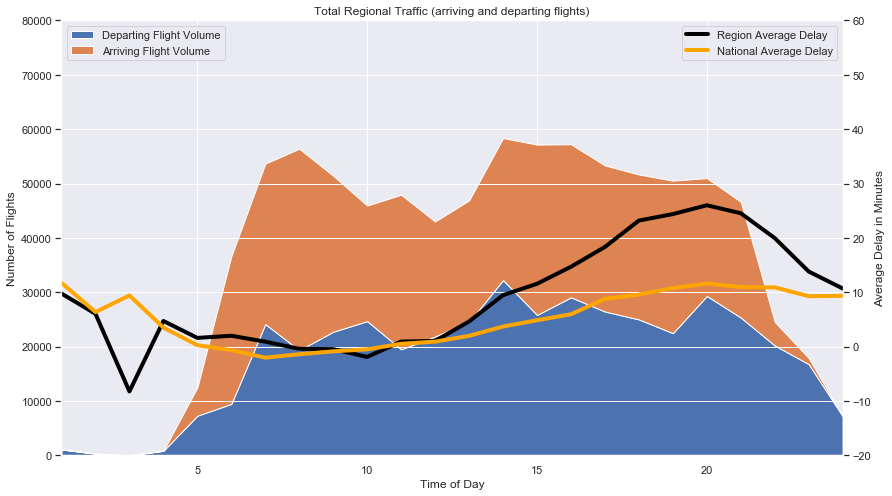

In [72]:
ax = plt.subplot(111)
y = [total['0_x'], total['0_y']]
x = total.index

ax.stackplot(x, y, labels=['Departing Flight Volume','Arriving Flight Volume'])
plt.legend(loc='upper left')
plt.xlabel('Time of Day')
plt.ylabel('Number of Flights')
plt.title('Total Regional Traffic (arriving and departing flights)')
plt.ylim(0,80000)
plt.xlim(1,24)

ax2 = ax.twinx()
ax2.plot(arr_del.index, arr_del['ArrDelay'], color='black', linewidth=4)
ax2.plot(total_del.index, total_del['ArrDelay'], color='orange', linewidth=4)
plt.ylabel('Average Delay in Minutes')
plt.ylim(-20,60)
plt.legend(['Region Average Delay', 'National Average Delay'], loc='upper right')

plt.show()

It looks like delays increase towards the evening hours of the day.

How do airlines perform throughout the week by hour. Is there a time of the week that results in more delays?

In [73]:
#add columns converting departure and arrival time to hourly increments
local['DEP_HOUR'] = local['CRSDepTime'].apply(lambda x: int(str(x)[:2]) if x>999 else int(str(x)[:1] if x>99 else 0))
local['ARR_HOUR'] = local['CRSArrTime'].apply(lambda x: int(str(x)[:2]) if x>999 else int(str(x)[:1] if x>99 else 0))

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
local_sub = local[['DayOfWeek','DEP_HOUR','Reporting_Airline','ArrDelay']]

In [75]:
local_sub['DayOfWeek'].replace(1,'Monday',inplace=True)
local_sub['DayOfWeek'].replace(2,'Tuesday',inplace=True)
local_sub['DayOfWeek'].replace(3,'Wednesday',inplace=True)
local_sub['DayOfWeek'].replace(4,'Thursday',inplace=True)
local_sub['DayOfWeek'].replace(5,'Friday',inplace=True)
local_sub['DayOfWeek'].replace(6,'Saturday',inplace=True)
local_sub['DayOfWeek'].replace(7,'Sunday',inplace=True)

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [76]:
local_sub.head()

,DayOfWeek,DEP_HOUR,Reporting_Airline,ArrDelay
1920,Monday,18,AA,4.0
1921,Tuesday,18,AA,-26.0
1922,Wednesday,18,AA,10.0
1923,Thursday,18,AA,13.0
1924,Friday,18,AA,-6.0


In [77]:
monday = local_sub[local_sub.DayOfWeek == 'Monday']
monday = monday.reset_index()
monday = monday.drop(['index', 'Reporting_Airline', 'DayOfWeek'], axis=1)
monday = monday.groupby('DEP_HOUR').mean()

tuesday = local_sub[local_sub.DayOfWeek == 'Tuesday']
tuesday = tuesday.reset_index()
tuesday = tuesday.drop(['index', 'Reporting_Airline', 'DayOfWeek'], axis=1)
tuesday = tuesday.groupby('DEP_HOUR').mean()

wednesday = local_sub[local_sub.DayOfWeek == 'Wednesday']
wednesday = wednesday.reset_index()
wednesday = wednesday.drop(['index', 'Reporting_Airline', 'DayOfWeek'], axis=1)
wednesday = wednesday.groupby('DEP_HOUR').mean()

thursday = local_sub[local_sub.DayOfWeek == 'Thursday']
thursday = thursday.reset_index()
thursday = thursday.drop(['index', 'Reporting_Airline', 'DayOfWeek'], axis=1)
thursday = thursday.groupby('DEP_HOUR').mean()

friday = local_sub[local_sub.DayOfWeek == 'Friday']
friday = friday.reset_index()
friday = friday.drop(['index', 'Reporting_Airline', 'DayOfWeek'], axis=1)
friday = friday.groupby('DEP_HOUR').mean()

saturday = local_sub[local_sub.DayOfWeek == 'Saturday']
saturday = saturday.reset_index()
saturday = saturday.drop(['index', 'Reporting_Airline', 'DayOfWeek'], axis=1)
saturday = saturday.groupby('DEP_HOUR').mean()

sunday = local_sub[local_sub.DayOfWeek == 'Sunday']
sunday = sunday.reset_index()
sunday = sunday.drop(['index', 'Reporting_Airline', 'DayOfWeek'], axis=1)
sunday = sunday.groupby('DEP_HOUR').mean()

In [84]:
sunday

,ArrDelay
DEP_HOUR,
1,-26.000000
2,-14.500000
4,-15.000000
5,-6.078341
6,-6.764431
7,-7.805594
8,-6.812081
9,-9.966633
10,-9.387982


In [86]:
sunday = sunday.drop([2])

In [87]:
new_df = pd.DataFrame()

In [88]:
new_df['Monday'] = monday.ArrDelay.values
new_df['Tuesday'] = tuesday.ArrDelay.values
new_df['Wednesday'] = wednesday.ArrDelay.values
new_df['Thursday'] = thursday.ArrDelay.values
new_df['Friday'] = friday.ArrDelay.values
new_df['Saturday'] = saturday.ArrDelay.values
new_df['Sunday'] = sunday.ArrDelay.values

In [89]:
new_df = new_df.reset_index()

In [90]:
new_df

,index,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,8.000000,-13.000000,6.000000,-13.000000,-22.000000,-8.000000,-15.000000
1,1,-5.473881,-6.683333,-6.397154,-5.679172,-2.791826,-1.992212,-6.078341
2,2,-1.152104,-4.154728,-5.874820,-5.455201,-3.569474,-3.138982,-6.764431
3,3,-0.556137,-4.455859,-5.681247,-4.840098,-1.958481,-1.445539,-7.805594
4,4,-0.459929,-2.704255,-4.754841,-3.232483,1.555795,-0.401795,-6.812081
5,5,1.054937,-1.086916,-3.972973,-0.735433,2.824853,-4.986824,-9.966633
6,6,1.298112,-2.407501,-3.607362,0.003726,1.674721,-1.947413,-9.387982
7,7,1.233184,-1.274029,-3.628728,-0.591940,3.311632,-3.342141,-7.184847
8,8,4.299939,4.051331,-1.125202,1.021409,8.210167,-3.111815,-3.898328
9,9,6.267593,6.291817,-0.267721,4.520107,9.846844,-2.122493,-1.269042


In [94]:
line = pd.DataFrame({"index": 0.0, "Monday": 0.0, "Tuesday": 0.0, "Wednesday": 0.0, "Thursday": 0.0,
                 "Friday": 0.0, "Saturday": 0.0, "Sunday": 0.0,}, index=[0.5])
new_df = new_df.append(line, ignore_index=False)
new_df = new_df.sort_index().reset_index(drop=True)

In [95]:
new_df = new_df.drop(columns=['index'])

In [96]:
hour_day = new_df.copy()

In [97]:
hour_day.index = hour_day.index.astype(str)

In [98]:
hour_day

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,8.000000,-13.000000,6.000000,-13.000000,-22.000000,-8.000000,-15.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,-5.473881,-6.683333,-6.397154,-5.679172,-2.791826,-1.992212,-6.078341
6,-1.152104,-4.154728,-5.874820,-5.455201,-3.569474,-3.138982,-6.764431
7,-0.556137,-4.455859,-5.681247,-4.840098,-1.958481,-1.445539,-7.805594
8,-0.459929,-2.704255,-4.754841,-3.232483,1.555795,-0.401795,-6.812081
9,1.054937,-1.086916,-3.972973,-0.735433,2.824853,-4.986824,-9.966633


In [99]:
from bokeh.plotting import figure
from bokeh.io import output_file, show
from bokeh.models import BasicTicker, ColorBar, ColumnDataSource, LinearColorMapper, PrintfTickFormatter
from bokeh.transform import transform

In [100]:
hour_day.columns.name = 'Day'

test = pd.DataFrame(hour_day.stack(), columns=['ArrDelay']).reset_index()
source = ColumnDataSource(test)

colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper(palette=colors, low=test.ArrDelay.min(), high=test.ArrDelay.max())
heatmap = figure(plot_width=900, plot_height=300, title='Average Flight Delays by Day and Hour for All Airlines',
                 x_range=list(hour_day.index), y_range=list(hour_day.columns))
heatmap.rect(x='level_0', y="Day", width=1, height=1, source=source,
       line_color=None, fill_color=transform('ArrDelay', mapper))


color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=len(colors)))

heatmap.add_layout(color_bar, 'right')

heatmap.xaxis.axis_label = 'Departure Hour'
heatmap.yaxis.axis_label = 'Day of the Week'

heatmap.axis.axis_line_color = None
heatmap.axis.major_tick_line_color = None
heatmap.axis.major_label_text_font_size = "8pt"
heatmap.axis.major_label_standoff = 0
heatmap.xaxis.major_label_orientation = 1.0

show(heatmap)

We see that Thursday and Friday afternoons seem particularly busy for this region.

<img src="./Images/NYC2018.png">

Why are we seeing more delays on Thursday and Friday evenings? Is there increase in airport traffic? or increase in passenger loading?

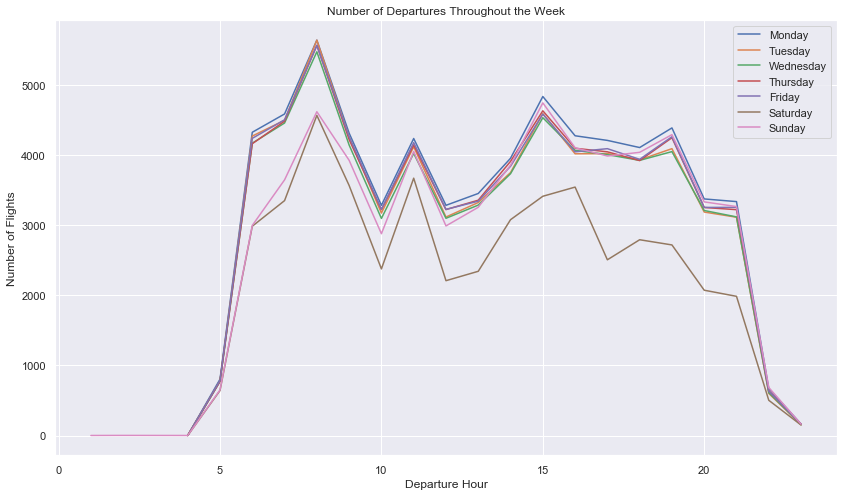

In [101]:
local.groupby(['DayOfWeek','DEP_HOUR']).size().unstack('DayOfWeek').plot()
plt.title('Number of Departures Throughout the Week')
plt.xlabel('Departure Hour')
plt.ylabel('Number of Flights')
plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

### Airline Passenger Loading Data (Load Factor)

In [102]:
#import the passenger load data
load_factor_df = pd.read_csv('./Data/Loading2018.csv')
load_factor_df = load_factor_df.drop(columns='Unnamed: 45')
load_factor_df.columns

Index(['DEPARTURES_SCHEDULED', 'DEPARTURES_PERFORMED', 'PAYLOAD', 'SEATS', 'PASSENGERS', 'FREIGHT',
       'MAIL', 'DISTANCE', 'RAMP_TO_RAMP', 'AIR_TIME', 'UNIQUE_CARRIER', 'AIRLINE_ID',
       'UNIQUE_CARRIER_NAME', 'UNIQUE_CARRIER_ENTITY', 'REGION', 'CARRIER', 'CARRIER_NAME',
       'CARRIER_GROUP', 'CARRIER_GROUP_NEW', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
       'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'AIRCRAFT_GROUP', 'AIRCRAFT_TYPE',
       'AIRCRAFT_CONFIG', 'YEAR', 'QUARTER', 'MONTH', 'DISTANCE_GROUP', 'CLASS'],
      dtype='object')

In [103]:
new_lf_df = load_factor_df[['PAYLOAD', 'SEATS', 'PASSENGERS', 'DISTANCE', 'RAMP_TO_RAMP', 'AIR_TIME',
       'CARRIER', 'CARRIER_NAME', 'CARRIER_GROUP_NEW', 'ORIGIN_AIRPORT_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
       'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'AIRCRAFT_TYPE', 'QUARTER', 'MONTH']]

In [104]:
new_lf_df.head()

,PAYLOAD,SEATS,PASSENGERS,DISTANCE,RAMP_TO_RAMP,AIR_TIME,CARRIER,CARRIER_NAME,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,AIRCRAFT_TYPE,QUARTER,MONTH
0,5600.0,0.0,0.0,618.0,120.0,110.0,U7,USA Jet Airlines Inc.,2.0,10208,AGS,"Augusta, GA",GA,YIP,"Detroit, MI",MI,681,1,1
1,30000.0,0.0,0.0,910.0,151.0,133.0,U7,USA Jet Airlines Inc.,2.0,10298,ANB,"Anniston, AL",AL,LRD,"Laredo, TX",TX,640,1,1
2,21500.0,0.0,0.0,1086.0,155.0,145.0,U7,USA Jet Airlines Inc.,2.0,10747,BRO,"Brownsville, TX",TX,SDF,"Louisville, KY",KY,635,1,1
3,5600.0,0.0,0.0,88.0,35.0,20.0,U7,USA Jet Airlines Inc.,2.0,10778,BTL,"Battle Creek, MI",MI,YIP,"Detroit, MI",MI,681,1,1
4,5600.0,0.0,0.0,810.0,175.0,155.0,U7,USA Jet Airlines Inc.,2.0,10994,CHS,"Charleston, SC",SC,RFD,"Rockford, IL",IL,681,1,1


In [105]:
matching_local_airports

['LGA', 'JFK', 'HPN', 'EWR']

In [106]:
new_lf_df = new_lf_df[new_lf_df.ORIGIN.isin(matching_local_airports)]

In [107]:
airlines = ['WN', 'HA', 'NK', 'F9', 'AS', 'EV', 'DL', 'VX', 'UA', 'OO', 'AA', 'B6']

In [108]:
new_lf_df = new_lf_df[new_lf_df.CARRIER.isin(airlines)]

In [109]:
new_lf_df['LOAD_FACTOR'] = (new_lf_df.PASSENGERS * new_lf_df.DISTANCE) / (new_lf_df.SEATS * new_lf_df.DISTANCE)

Text(0, 0.5, 'Number of Passengers')

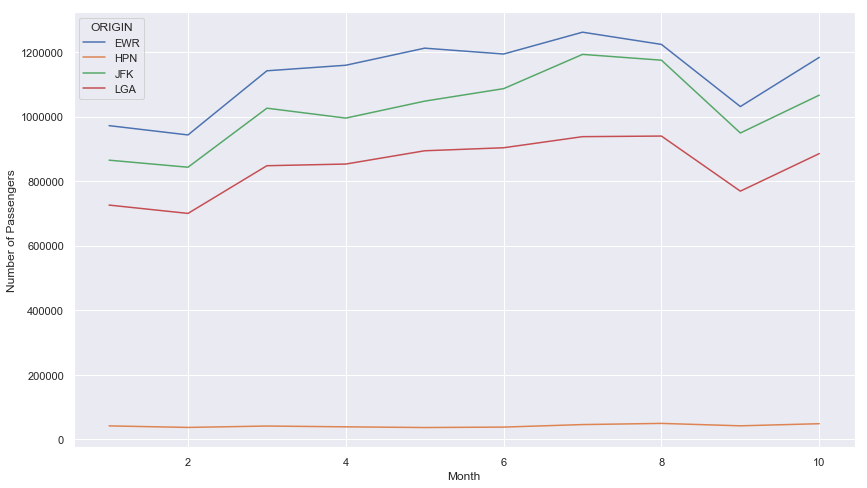

In [110]:
new_lf_df.groupby(['MONTH','ORIGIN'])['PASSENGERS'].sum().unstack().plot()
plt.xlabel('Month')
plt.ylabel('Number of Passengers')

Text(0.5, 1.0, 'Average Load Factor for NYC Area, by month')

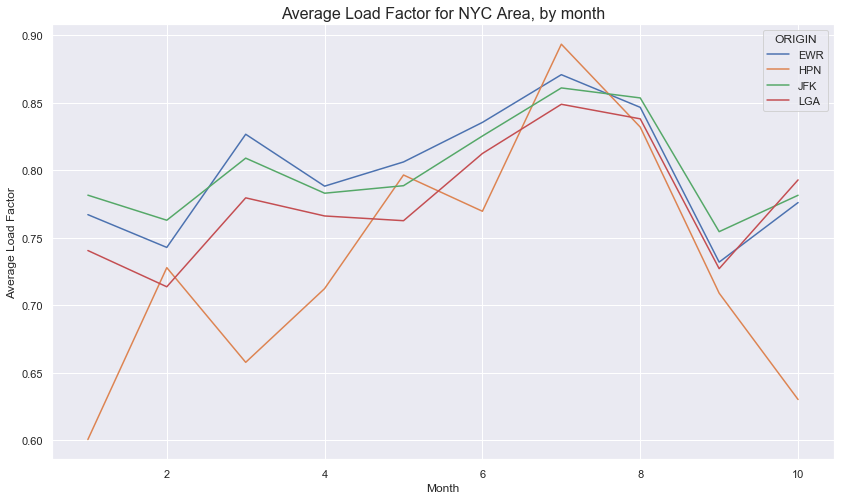

In [111]:
new_lf_df.groupby(['MONTH','ORIGIN'])['LOAD_FACTOR'].mean().unstack().plot()
plt.xlabel('Month')
plt.ylabel('Average Load Factor')
plt.title('Average Load Factor for NYC Area, by month', fontsize=16)

## Most Delayed and Most On-Time Routes by Airline (Weighted Average)

In [112]:
#Using Plotly we'll plot most delayed routes by airline
#To plot the data we'll need an account with an API KEY (stored as Environment Variable)
username = os.environ.get('plotlyUSRNAME')
API_KEY = os.environ.get('plotlyAPI_KEY')
import plotly 
plotly.tools.set_credentials_file(username=username, api_key=API_KEY)

In [113]:
#import airport location information csv
airport_loc = pd.read_csv('./Data/airport_loc.csv')
airport_loc['Longitude'] = airport_loc.Longitude * -1
airport_loc = airport_loc.set_index('locationID')
airport_loc.head()

,Latitude,Longitude
locationID,,
YUM,32.6686,-114.5991
MQT,46.3497,-87.3873
SCE,40.8500,-77.8487
ECP,30.3553,-85.7991
ADK,51.8781,-176.6461


In [114]:
airport_dict = airport_loc.to_dict()

### United Airlines (Weighted Average)

In [115]:
#Creating a dataframe for United Airlines flights that are on-time or early.
united = df[df.Reporting_Airline == 'UA']

In [116]:
united.head()

,index,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginState,DestState,Dest,CRSDepTime,DepTime,DepDelay,TaxiOut,TaxiIn,CRSArrTime,ArrTime,CRSElapsedTime,ArrDelay,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ARR_HOUR
86491,87169,4,10,5,5,2018-10-05,UA,N73291,2132,PHL,PA,CA,SFO,1835,1824.0,-11.0,25.0,7.0,2150,2137.0,375.0,-13.0,2521.0,11,0.0,0.0,0.0,0.0,0.0,21
86492,87170,4,10,5,5,2018-10-05,UA,N69833,2131,IAH,TX,IL,ORD,1949,1948.0,-1.0,18.0,23.0,2220,2319.0,151.0,59.0,925.0,4,0.0,0.0,59.0,0.0,0.0,22
86493,87171,4,10,5,5,2018-10-05,UA,N892UA,2130,IAH,TX,NC,RDU,730,726.0,-4.0,18.0,4.0,1108,1111.0,158.0,3.0,1042.0,5,0.0,0.0,0.0,0.0,0.0,11
86494,87172,4,10,5,5,2018-10-05,UA,N14240,2129,SJC,CA,IL,ORD,655,659.0,4.0,13.0,17.0,1305,1320.0,250.0,15.0,1829.0,8,0.0,0.0,15.0,0.0,0.0,13
86495,87173,4,10,5,5,2018-10-05,UA,N36272,2128,SFO,CA,FL,MIA,918,916.0,-2.0,18.0,6.0,1748,1741.0,330.0,-7.0,2585.0,11,0.0,0.0,0.0,0.0,0.0,17


In [117]:
#Adding coordinates to origin and departure airports

#Origin
united['start_lat'] = united.Origin.apply(lambda x: airport_dict['Latitude'].get(x))
united['start_lon'] = united.Origin.apply(lambda x: airport_dict['Longitude'].get(x))

#Destination
united['end_lat'] = united.Dest.apply(lambda x: airport_dict['Latitude'].get(x))
united['end_lon'] = united.Dest.apply(lambda x: airport_dict['Longitude'].get(x))

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

In [118]:
#create a flight count dataframe for easier look up
flight_cnt = pd.DataFrame(united.groupby(['Origin', 'Dest']).size())
avg_delay = pd.DataFrame(united.groupby(['Origin', 'Dest'])['ArrDelay'].mean())

In [119]:
#create dictionaries to use for look up
flight_cnt_dict = flight_cnt.to_dict()[0]
avg_delay_dict = avg_delay.to_dict()['ArrDelay']

In [120]:
#Temporary column containing a tuple of origin and dest
united['temp'] = list(zip(united.Origin, united.Dest))
#Column with count and avg delay of flights in the specified route
united['cnt'] = united.temp.apply(lambda x: flight_cnt_dict.get(x))
united['avg_del'] = united.temp.apply(lambda x: avg_delay_dict.get(x))

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

In [121]:
df_flight_paths = united[['start_lat', 'start_lon', 'end_lat', 'end_lon', 
                            'Reporting_Airline', 'Origin', 'Dest', 'cnt','avg_del']]
df_flight_paths = df_flight_paths.rename(columns={'Origin':'airport1','Dest':'airport2',
                                                 'Reporting_Airline':'airline'})
df_flight_paths = df_flight_paths.drop_duplicates(['airport1','airport2'])

In [122]:
df_flight_paths['wt_delay'] = df_flight_paths.cnt * df_flight_paths.avg_del 

In [123]:
#creating a dataframe for most delayed routes
df_flight_paths_del = df_flight_paths.sort_values(['wt_delay'], ascending=False)[0:200]
df_flight_paths_del = df_flight_paths_del.reset_index()

In [124]:
#creating a dataframe for most on-time routes
df_flight_paths_ontime = df_flight_paths.sort_values(['wt_delay'])[0:200]
df_flight_paths_ontime['wt_delay'] = df_flight_paths_ontime['wt_delay'] * -1
df_flight_paths_ontime = df_flight_paths_ontime.reset_index()

In [125]:
df_flight_paths_ontime.head()

,index,start_lat,start_lon,end_lat,end_lon,airline,airport1,airport2,cnt,avg_del,wt_delay
0,86634,33.9425,-118.4072,29.9844,-95.3414,UA,LAX,IAH,3615,-2.642600,9553.0
1,87206,19.7388,-156.0456,33.9425,-118.4072,UA,KOA,LAX,684,-12.163743,8320.0
2,86885,33.9425,-118.4072,19.7388,-156.0456,UA,LAX,KOA,684,-12.055556,8246.0
3,88054,20.8986,-156.4306,33.9425,-118.4072,UA,OGG,LAX,794,-9.148615,7264.0
4,88387,33.9425,-118.4072,20.8986,-156.4306,UA,LAX,OGG,794,-8.949622,7106.0


In [126]:
df_flight_paths_del.head()

,index,start_lat,start_lon,end_lat,end_lon,airline,airport1,airport2,cnt,avg_del,wt_delay
0,86724,41.9808,-87.9067,37.6189,-122.3750,UA,ORD,SFO,4385,12.564652,55096.0
1,86579,37.6189,-122.3750,40.6925,-74.1686,UA,SFO,EWR,4497,12.222815,54966.0
2,86545,41.9808,-87.9067,40.7772,-73.8725,UA,ORD,LGA,4232,12.810255,54213.0
3,86627,41.9808,-87.9067,40.6925,-74.1686,UA,ORD,EWR,3085,17.538736,54107.0
4,86546,42.3631,-71.0064,40.6925,-74.1686,UA,BOS,EWR,3428,15.319428,52515.0


In [149]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()


airports = [go.Scattergeo(
    locationmode = 'USA-states',
    lon = df_airports['long'],
    lat = df_airports['lat'],
    hoverinfo = 'text',
    text = df_airports['airport'],
    mode = 'markers',
    marker = go.scattergeo.Marker(
        size = 2,
        color = 'rgb(0, 0, 255)',
        line = go.scattergeo.marker.Line(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    ))]

flight_paths = []
for i in range(len(df_flight_paths_del)):
    flight_paths.append(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [df_flight_paths_del['start_lon'][i], df_flight_paths_del['end_lon'][i]],
            lat = [df_flight_paths_del['start_lat'][i], df_flight_paths_del['end_lat'][i]],
            mode = 'lines',
            line = go.scattergeo.Line(
                width = 1,
                color = 'blue',
            ),
            opacity = float(df_flight_paths_del['cnt'][i]) / float(df_flight_paths_del['cnt'].max()),
        )
    )

layout = go.Layout(
    title = go.layout.Title(
        text = '2018 United Airlines Most Delayed Routes (weighted average)'
    ),
    
    showlegend = False,
    geo = go.layout.Geo(
        #resolution = 50,
        showlakes = True,
        scope = 'north america',
        projection = go.layout.geo.Projection(type = 'azimuthal equal area'),
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig = go.Figure(data = flight_paths + airports, layout = layout)
py.iplot(fig, filename = 'United_Most_Delayed_Routes')

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



<img src="./Images/newplot-1.png">

In [150]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()


airports = [go.Scattergeo(
    locationmode = 'USA-states',
    lon = df_airports['long'],
    lat = df_airports['lat'],
    hoverinfo = 'text',
    text = df_airports['airport'],
    mode = 'markers',
    marker = go.scattergeo.Marker(
        size = 2,
        color = 'rgb(0, 0, 255)',
        line = go.scattergeo.marker.Line(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    ))]

flight_paths = []
for i in range(len(df_flight_paths_ontime)):
    flight_paths.append(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [df_flight_paths_ontime['start_lon'][i], df_flight_paths_ontime['end_lon'][i]],
            lat = [df_flight_paths_ontime['start_lat'][i], df_flight_paths_ontime['end_lat'][i]],
            mode = 'lines',
            line = go.scattergeo.Line(
                width = 1,
                color = 'blue',
            ),
            opacity = float(df_flight_paths_ontime['cnt'][i]) / float(df_flight_paths_ontime['cnt'].max()),
        )
    )

layout = go.Layout(
    title = go.layout.Title(
        text = '2018 United Airlines Most On-Time Routes (weighted average)'
    ),
    
    showlegend = False,
    geo = go.layout.Geo(
        #resolution = 50,
        showlakes = True,
        scope = 'north america',
        projection = go.layout.geo.Projection(type = 'azimuthal equal area'),
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig = go.Figure(data = flight_paths + airports, layout = layout)
py.iplot(fig, filename = 'United_Most_On-Time_Routes')

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



<img src="./Images/newplot-2.png">

#### Delayed most common airport origin and destination

In [129]:
df_flight_paths_del.head()

,index,start_lat,start_lon,end_lat,end_lon,airline,airport1,airport2,cnt,avg_del,wt_delay
0,86724,41.9808,-87.9067,37.6189,-122.3750,UA,ORD,SFO,4385,12.564652,55096.0
1,86579,37.6189,-122.3750,40.6925,-74.1686,UA,SFO,EWR,4497,12.222815,54966.0
2,86545,41.9808,-87.9067,40.7772,-73.8725,UA,ORD,LGA,4232,12.810255,54213.0
3,86627,41.9808,-87.9067,40.6925,-74.1686,UA,ORD,EWR,3085,17.538736,54107.0
4,86546,42.3631,-71.0064,40.6925,-74.1686,UA,BOS,EWR,3428,15.319428,52515.0


In [130]:
df_flight_paths_del.groupby(['airport1']).size().sort_values(ascending=False)[0:5]

airport1
ORD    33
EWR    31
SFO    16
IAH    16
IAD     8
dtype: int64

In [131]:
df_flight_paths_del.groupby('airport2').size().sort_values(ascending=False)[0:5]

airport2
EWR    32
ORD    31
SFO    25
IAH    16
IAD     7
dtype: int64

#### On-time most common airport origin and destination

In [132]:
df_flight_paths_ontime.head()

,index,start_lat,start_lon,end_lat,end_lon,airline,airport1,airport2,cnt,avg_del,wt_delay
0,86634,33.9425,-118.4072,29.9844,-95.3414,UA,LAX,IAH,3615,-2.642600,9553.0
1,87206,19.7388,-156.0456,33.9425,-118.4072,UA,KOA,LAX,684,-12.163743,8320.0
2,86885,33.9425,-118.4072,19.7388,-156.0456,UA,LAX,KOA,684,-12.055556,8246.0
3,88054,20.8986,-156.4306,33.9425,-118.4072,UA,OGG,LAX,794,-9.148615,7264.0
4,88387,33.9425,-118.4072,20.8986,-156.4306,UA,LAX,OGG,794,-8.949622,7106.0


In [133]:
df_flight_paths_ontime.groupby('airport1').size().sort_values(ascending=False)[0:5]

airport1
DEN    20
LAX    17
EWR    11
SFO     9
IAH     6
dtype: int64

In [134]:
df_flight_paths_ontime.groupby('airport2').size().sort_values(ascending=False)[0:5]

airport2
DEN    48
IAH    23
LAX    15
SFO    14
IAD    11
dtype: int64

### Delta Airlines (Weighted Average)

In [135]:
#Creating a dataframe for United Airlines flights that are on-time or early.
delta = df[df.Reporting_Airline == 'DL']

In [136]:
delta.head()

,index,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginState,DestState,Dest,CRSDepTime,DepTime,DepDelay,TaxiOut,TaxiIn,CRSArrTime,ArrTime,CRSElapsedTime,ArrDelay,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ARR_HOUR
33314,33680,4,10,1,1,2018-10-01,DL,N552NW,3,RSW,FL,GA,ATL,1105,1058.0,-7.0,8.0,10.0,1245,1233.0,100.0,-12.0,515.0,3,0.0,0.0,0.0,0.0,0.0,12
33315,33681,4,10,1,1,2018-10-01,DL,N3742C,6,LAX,CA,UT,SLC,1135,1132.0,-3.0,10.0,10.0,1429,1411.0,114.0,-18.0,590.0,3,0.0,0.0,0.0,0.0,0.0,14
33316,33682,4,10,1,1,2018-10-01,DL,N318DX,7,SLC,UT,CA,LAX,700,653.0,-7.0,17.0,8.0,756,746.0,116.0,-10.0,590.0,3,0.0,0.0,0.0,0.0,0.0,7
33317,33683,4,10,1,1,2018-10-01,DL,N945DN,10,DEN,CO,MN,MSP,1333,1336.0,3.0,9.0,4.0,1632,1613.0,119.0,-19.0,680.0,3,0.0,0.0,0.0,0.0,0.0,16
33318,33684,4,10,1,1,2018-10-01,DL,N895DN,11,MSP,MN,CO,DEN,1746,1743.0,-3.0,14.0,6.0,1904,1840.0,138.0,-24.0,680.0,3,0.0,0.0,0.0,0.0,0.0,19


In [137]:
#Adding Coordinates to the DataFrame
#Origin
delta['start_lat'] = delta.Origin.apply(lambda x: airport_dict['Latitude'].get(x))
delta['start_lon'] = delta.Origin.apply(lambda x: airport_dict['Longitude'].get(x))
#Destination                                       
delta['end_lat'] = delta.Dest.apply(lambda x: airport_dict['Latitude'].get(x))
delta['end_lon'] = delta.Dest.apply(lambda x: airport_dict['Longitude'].get(x))                               

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

In [138]:
#create a flight count dataframe for easier look up
flight_cnt = pd.DataFrame(delta.groupby(['Origin','Dest']).size())
avg_delay = pd.DataFrame(delta.groupby(['Origin', 'Dest'])['ArrDelay'].mean())

In [139]:
#create dictionaries to use for look up
flight_cnt_dict = flight_cnt.to_dict()[0]
avg_delay_dict = avg_delay.to_dict()['ArrDelay']

In [140]:
#Temporary column containing a tuple of origin and dest
delta['temp'] = list(zip(delta.Origin, delta.Dest))
#Column with count of flights in the specified route
delta['cnt'] = delta.temp.apply(lambda x: flight_cnt_dict.get(x))
delta['avg_del'] = delta.temp.apply(lambda x: avg_delay_dict.get(x))

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

In [141]:
df_flight_paths = delta[['start_lat', 'start_lon', 'end_lat', 'end_lon', 
                            'Reporting_Airline', 'Origin', 'Dest', 'cnt','avg_del']]
df_flight_paths = df_flight_paths.rename(columns={'Origin':'airport1','Dest':'airport2',
                                                 'Reporting_Airline':'airline'})
df_flight_paths = df_flight_paths.drop_duplicates(['airport1','airport2'])

In [142]:
df_flight_paths['wt_delay'] = df_flight_paths.cnt * df_flight_paths.avg_del 

In [143]:
#creating a dataframe for most delayed routes
df_flight_paths_del = df_flight_paths.sort_values(['wt_delay'], ascending=False)[0:200]
df_flight_paths_del = df_flight_paths_del.reset_index()

In [144]:
#creating a dataframe for most on-time routes
df_flight_paths_ontime = df_flight_paths.sort_values(['wt_delay'])[0:200]
df_flight_paths_ontime['wt_delay'] = df_flight_paths_ontime['wt_delay'] * -1
df_flight_paths_ontime = df_flight_paths_ontime.reset_index()

In [145]:
df_flight_paths_ontime.head()

,index,start_lat,start_lon,end_lat,end_lon,airline,airport1,airport2,cnt,avg_del,wt_delay
0,33321,36.0800,-115.1522,42.2125,-83.3533,DL,LAS,DTW,1800,-10.831667,19497.0
1,33854,33.4342,-112.0117,44.8819,-93.2217,DL,PHX,MSP,1914,-9.318182,17835.0
2,33383,36.0800,-115.1522,44.8819,-93.2217,DL,LAS,MSP,2160,-7.919444,17106.0
3,33322,42.2125,-83.3533,36.0800,-115.1522,DL,DTW,LAS,1796,-8.631960,15503.0
4,33350,44.8819,-93.2217,36.0800,-115.1522,DL,MSP,LAS,2168,-7.140221,15480.0


In [146]:
df_flight_paths_del.head()

,index,start_lat,start_lon,end_lat,end_lon,airline,airport1,airport2,cnt,avg_del,wt_delay
0,33555,33.6367,-84.4281,40.6925,-74.1686,DL,ATL,EWR,3840,14.786719,56781.0
1,33410,35.8778,-78.7875,33.6367,-84.4281,DL,RDU,ATL,4264,8.191135,34927.0
2,33359,33.6367,-84.4281,42.3631,-71.0064,DL,ATL,BOS,4053,8.168517,33107.0
3,34366,33.6367,-84.4281,30.3553,-85.7991,DL,ATL,ECP,1971,16.078133,31690.0
4,33397,40.6925,-74.1686,33.6367,-84.4281,DL,EWR,ATL,3850,8.157922,31408.0


In [151]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()


airports = [go.Scattergeo(
    locationmode = 'USA-states',
    lon = df_airports['long'],
    lat = df_airports['lat'],
    hoverinfo = 'text',
    text = df_airports['airport'],
    mode = 'markers',
    marker = go.scattergeo.Marker(
        size = 2,
        color = 'green',
        line = go.scattergeo.marker.Line(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    ))]

flight_paths = []
for i in range(len(df_flight_paths_del)):
    flight_paths.append(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [df_flight_paths_del['start_lon'][i], df_flight_paths_del['end_lon'][i]],
            lat = [df_flight_paths_del['start_lat'][i], df_flight_paths_del['end_lat'][i]],
            mode = 'lines',
            line = go.scattergeo.Line(
                width = 1,
                color = 'green',
            ),
            opacity = float(df_flight_paths_del['cnt'][i]) / float(df_flight_paths_del['cnt'].max()),
        )
    )

layout = go.Layout(
    title = go.layout.Title(
        text = '2018 Delta Airlines Most Delayed Routes (weighted average)'
    ),
    
    showlegend = False,
    geo = go.layout.Geo(
        #resolution = 50,
        showlakes = True,
        scope = 'north america',
        projection = go.layout.geo.Projection(type = 'azimuthal equal area'),
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig = go.Figure(data = flight_paths + airports, layout = layout)
py.iplot(fig, filename = 'Delta_Most_Delayed_Routes')

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



<img src="./Images/newplot-5.png">

In [152]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()


airports = [go.Scattergeo(
    locationmode = 'USA-states',
    lon = df_airports['long'],
    lat = df_airports['lat'],
    hoverinfo = 'text',
    text = df_airports['airport'],
    mode = 'markers',
    marker = go.scattergeo.Marker(
        size = 2,
        color = 'green',
        line = go.scattergeo.marker.Line(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    ))]

flight_paths = []
for i in range(len(df_flight_paths_ontime)):
    flight_paths.append(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [df_flight_paths_ontime['start_lon'][i], df_flight_paths_ontime['end_lon'][i]],
            lat = [df_flight_paths_ontime['start_lat'][i], df_flight_paths_ontime['end_lat'][i]],
            mode = 'lines',
            line = go.scattergeo.Line(
                width = 1,
                color = 'green',
            ),
            opacity = float(df_flight_paths_ontime['cnt'][i]) / float(df_flight_paths_ontime['cnt'].max()),
        )
    )

layout = go.Layout(
    title = go.layout.Title(
        text = '2018 Delta Airlines Most On-Time Routes (weighted average)'
    ),
    
    showlegend = False,
    geo = go.layout.Geo(
        #resolution = 50,
        showlakes = True,
        scope = 'north america',
        projection = go.layout.geo.Projection(type = 'azimuthal equal area'),
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig = go.Figure(data = flight_paths + airports, layout = layout)
py.iplot(fig, filename = 'Delta_Most_On-Time_Routes')

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



<img src="./Images/newplot-6.png">